# Air pollution estimation

In [110]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from utils import *

datasets_folder = './datasets'
starting_date = datetime(2019,1,1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataframe creation

### Air pollution Dataset

In [111]:
air_pollution_dataset = os.path.join(datasets_folder,'pollution/pollution.csv')

air_pollution_df = pd.read_csv(air_pollution_dataset, sep=';')
air_pollution_df.head(3)

COD_STAZ                   AGENTE                DATA_INIZIO  \
0  PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO)  2019-01-01T17:01:00+01:00   
1  PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO)  2019-01-02T07:01:00+01:00   
2  PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO)  2019-01-11T08:01:00+01:00   

                   DATA_FINE  VALORE     UM  
0  2019-01-01T18:00:00+01:00    42.0  ug/m3  
1  2019-01-02T08:00:00+01:00    42.0  ug/m3  
2  2019-01-11T09:00:00+01:00    42.0  ug/m3

In [112]:
air_pollution_df['DATA_INIZIO'] = pd.to_datetime(air_pollution_df['DATA_INIZIO'], utc=True).dt.tz_localize(None)
air_pollution_df['DATA_FINE'] = pd.to_datetime(air_pollution_df['DATA_FINE'], utc=True).dt.tz_localize(None)

### Traffic Dataset

In [113]:
traffic_folder = os.path.join(datasets_folder,'traffic')

readings_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'readings'), sep=';')
accuracies_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'accuracies'), sep=';')

Merged 6 CSV files
Merged 6 CSV files


In [114]:
print('Dates ascending: ',readings_df['data'].is_monotonic_increasing)
readings_df.head(3)

Dates ascending:  False


data    codice spira  00:00-01:00  01:00-02:00  02:00-03:00  \
0  2019-01-01   0.127 1.4 2 1          120          142          119   
1  2019-01-01  0.127 1.12 8 1           59           68           72   
2  2019-01-01  0.127 1.15 6 1           37           31           33   

   03:00-04:00  04:00-05:00  05:00-06:00  06:00-07:00  07:00-08:00  ...  \
0           70           59           31           19           38  ...   
1           46           29            8           11           19  ...   
2           27           13            8           15           16  ...   

   stato  codimpsem  direzione  angolo  longitudine  latitudine  \
0      A      318.0          S   170.0    11.347424   44.500815   
1      A      316.0          N   350.0    11.338970   44.495251   
2      A      324.0          S   168.0    11.343443   44.490027   

                             geopoint  ID_univoco_stazione_spira  \
0  44.5008152038968, 11.3474244254298                       15.0   
1   44.4952505129043, 11.338970003537                        2.0   
2  44.4900271601578, 11.3434427397635                        7.0   

   Giorno della settimana  giorno settimana  
0                 Martedì               NaN  
1                 Martedì               NaN  
2                 Martedì               NaN  

[3 rows x 46 columns]

In [115]:
print('Dates ascending: ',readings_df['data'].is_monotonic_increasing)
accuracies_df.head(3)

Dates ascending:  False


data   codice spira 00:00-01:00 01:00-02:00 02:00-03:00 03:00-04:00  \
0  2019-01-14  4.30 4.96 4 1        100%        100%        100%        100%   
1  2019-01-14  4.31 4.29 6 1        100%        100%        100%         95%   
2  2019-01-14  4.31 4.39 4 1        100%        100%        100%        100%   

  04:00-05:00 05:00-06:00 06:00-07:00 07:00-08:00  ... 14:00-15:00  \
0        100%        100%        100%        100%  ...        100%   
1         58%         87%        100%        100%  ...         83%   
2         66%         83%        100%        100%  ...        100%   

  15:00-16:00 16:00-17:00 17:00-18:00 18:00-19:00 19:00-20:00 20:00-21:00  \
0        100%        100%        100%        100%        100%        100%   
1         91%        100%        100%         91%         79%         95%   
2        100%        100%        100%        100%        100%        100%   

  21:00-22:00 22:00-23:00 23:00-24:00  
0        100%        100%        100%  
1         87%         95%        100%  
2        100%        100%        100%  

[3 rows x 26 columns]

### Weather Dataset

In [116]:
weather_folder = os.path.join(datasets_folder,'weather')

weather_df = merge_csv_to_dataframe(weather_folder)
weather_df

Merged 6 CSV files


PragaTime  TAVG  PREC  RHAVG  RAD  W_SCAL_INT  W_VEC_DIR  \
0      2019-01-01 00:00:00   1.0   0.0   92.3  0.0         0.5      208.7   
1      2019-01-01 01:00:00   0.3   0.0   93.6  0.0         0.5      280.0   
2      2019-01-01 02:00:00   0.7   0.0   91.7  0.0         1.1      158.1   
3      2019-01-01 03:00:00   0.4   0.0   91.5  0.0         0.7      189.4   
4      2019-01-01 04:00:00   1.0   0.0   86.3  0.0         0.7      172.9   
...                    ...   ...   ...    ...  ...         ...        ...   
52580  2024-12-30 20:00:00   6.2   0.0   72.1  0.0         2.0      268.9   
52581  2024-12-30 21:00:00   5.6   0.0   76.1  0.0         2.5      258.0   
52582  2024-12-30 22:00:00   5.7   0.0   75.3  0.0         2.8      254.1   
52583  2024-12-30 23:00:00   5.1   0.0   76.1  0.0         2.8      256.7   
52584  2024-12-31 00:00:00   5.1   0.0   75.0  0.0         2.8      258.3   

       W_VEC_INT  LEAFW  ET0  
0            0.3    0.0  0.0  
1            0.2    0.0  0.0  
2            1.0    0.0  0.0  
3            0.4    0.0  0.0  
4            0.6    0.0  0.0  
...          ...    ...  ...  
52580        1.6    0.0  0.0  
52581        2.4    0.0  0.0  
52582        2.7    0.0  0.0  
52583        2.7    0.0  0.0  
52584        2.7    0.0  0.0  

[52585 rows x 10 columns]

## Data exploration

In [117]:
air_pollution_df.describe(include='all')

COD_STAZ                   AGENTE  \
count             472619                   472619   
unique                 3                        8   
top     PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO)   
freq              259799                   154711   
mean                 NaN                      NaN   
min                  NaN                      NaN   
25%                  NaN                      NaN   
50%                  NaN                      NaN   
75%                  NaN                      NaN   
max                  NaN                      NaN   
std                  NaN                      NaN   

                          DATA_INIZIO                      DATA_FINE  \
count                          472619                         472619   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2022-01-08 00:07:04.289205760  2022-01-08 01:37:08.391156480   
min               2018-12-31 23:01:00            2019-01-01 00:00:00   
25%               2020-07-11 18:01:00            2020-07-11 19:00:00   
50%               2022-01-12 19:01:00            2022-01-12 21:00:00   
75%               2023-07-07 16:01:00            2023-07-07 18:00:00   
max               2024-12-31 22:01:00            2024-12-31 23:00:00   
std                               NaN                            NaN   

               VALORE      UM  
count   472607.000000  472619  
unique            NaN       2  
top               NaN   ug/m3  
freq              NaN  420828  
mean        28.426199     NaN  
min         -2.000000     NaN  
25%          2.100000     NaN  
50%         16.000000     NaN  
75%         42.000000     NaN  
max        598.000000     NaN  
std         34.394578     NaN

In [118]:
print(np.unique(air_pollution_df['UM'], return_counts=True))

(array(['mg/m3', 'ug/m3'], dtype=object), array([ 51791, 420828], dtype=int64))


In [119]:
air_pollution_df[air_pollution_df['UM'] == 'ug/m3'].describe()

DATA_INIZIO                      DATA_FINE  \
count                         420828                         420828   
mean   2022-01-07 23:53:58.773275904  2022-01-08 01:27:52.271807232   
min              2018-12-31 23:01:00            2019-01-01 00:00:00   
25%              2020-07-11 18:01:00            2020-07-11 19:00:00   
50%              2022-01-12 15:01:00            2022-01-12 17:00:00   
75%              2023-07-07 10:01:00            2023-07-07 12:00:00   
max              2024-12-31 22:01:00            2024-12-31 23:00:00   
std                              NaN                            NaN   

              VALORE  
count  420816.000000  
mean       31.853484  
min        -2.000000  
25%         6.000000  
50%        21.000000  
75%        46.000000  
max       598.000000  
std        34.948258

In [120]:
air_pollution_df[air_pollution_df['UM'] == 'mg/m3'].describe(include='all')

COD_STAZ                      AGENTE  \
count              51791                       51791   
unique                 1                           1   
top     PORTA SAN FELICE  CO (MONOSSIDO DI CARBONIO)   
freq               51791                       51791   
mean                 NaN                         NaN   
min                  NaN                         NaN   
25%                  NaN                         NaN   
50%                  NaN                         NaN   
75%                  NaN                         NaN   
max                  NaN                         NaN   
std                  NaN                         NaN   

                          DATA_INIZIO                      DATA_FINE  \
count                           51791                          51791   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2022-01-08 01:53:27.002375168  2022-01-08 02:52:27.141395200   
min               2018-12-31 23:01:00            2019-01-01 00:00:00   
25%               2020-07-11 18:31:00            2020-07-11 19:30:00   
50%               2022-01-14 00:01:00            2022-01-14 01:00:00   
75%               2023-07-09 16:31:00            2023-07-09 17:30:00   
max               2024-12-31 22:01:00            2024-12-31 23:00:00   
std                               NaN                            NaN   

              VALORE     UM  
count   51791.000000  51791  
unique           NaN      1  
top              NaN  mg/m3  
freq             NaN  51791  
mean        0.578575    NaN  
min         0.000000    NaN  
25%         0.300000    NaN  
50%         0.500000    NaN  
75%         0.800000    NaN  
max         6.800000    NaN  
std         0.310264    NaN

Due unità di misura: mg solo per CO a porta san felice

In [ ]:
air_pollution_df.loc[air_pollution_df['UM'] == 'mg/m3', 'VALORE'] *= 100
air_pollution_df

COD_STAZ                   AGENTE         DATA_INIZIO  \
0          PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO) 2019-01-01 16:01:00   
1          PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO) 2019-01-02 06:01:00   
2          PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO) 2019-01-11 07:01:00   
3          PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO) 2019-01-19 09:01:00   
4          PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO) 2019-01-27 05:01:00   
...                     ...                      ...                 ...   
472614     PORTA SAN FELICE  NO (MONOSSIDO DI AZOTO) 2022-01-07 21:01:00   
472615  GIARDINI MARGHERITA                     PM10 2022-01-06 23:01:00   
472616  GIARDINI MARGHERITA  NO2 (BIOSSIDO DI AZOTO) 2022-01-07 23:01:00   
472617  GIARDINI MARGHERITA                    PM2.5 2022-01-06 23:01:00   
472618  GIARDINI MARGHERITA               O3 (OZONO) 2022-01-08 01:01:00   

                 DATA_FINE  VALORE     UM  
0      2019-01-01 17:00:00    42.0  ug/m3  
1      2019-01-02 07:00:00    42.0  ug/m3  
2      2019-01-11 08:00:00    42.0  ug/m3  
3      2019-01-19 10:00:00    42.0  ug/m3  
4      2019-01-27 06:00:00    42.0  ug/m3  
...                    ...     ...    ...  
472614 2022-01-07 22:00:00    19.0  ug/m3  
472615 2022-01-07 23:00:00    21.0  ug/m3  
472616 2022-01-08 00:00:00    21.0  ug/m3  
472617 2022-01-07 23:00:00    15.0  ug/m3  
472618 2022-01-08 02:00:00     7.0  ug/m3  

[472619 rows x 6 columns]

52601 measurements, 3 different, 8 agents

In [125]:
giardini_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'GIARDINI MARGHERITA']
san_felice_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'PORTA SAN FELICE']
chiarini_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'VIA CHIARINI']

In [106]:
print(f"{np.unique(air_pollution_df['DATA_INIZIO'].apply(lambda x: x.date())).shape[0]} days of data")
print(f"{np.unique(giardini_df['DATA_INIZIO'].apply(lambda x: x.date())).shape[0]} days of data for Giardini Margherita")
print(f"{np.unique(san_felice_df['DATA_INIZIO'].apply(lambda x: x.date())).shape[0]} days of data for Porta San Felice")
print(f"{np.unique(chiarini_df['DATA_INIZIO'].apply(lambda x: x.date())).shape[0]} days of data for Via Chiarini")

2193 days of data
2191 days of data for Giardini Margherita
2193 days of data for Porta San Felice
2191 days of data for Via Chiarini


### Agents measurements per station

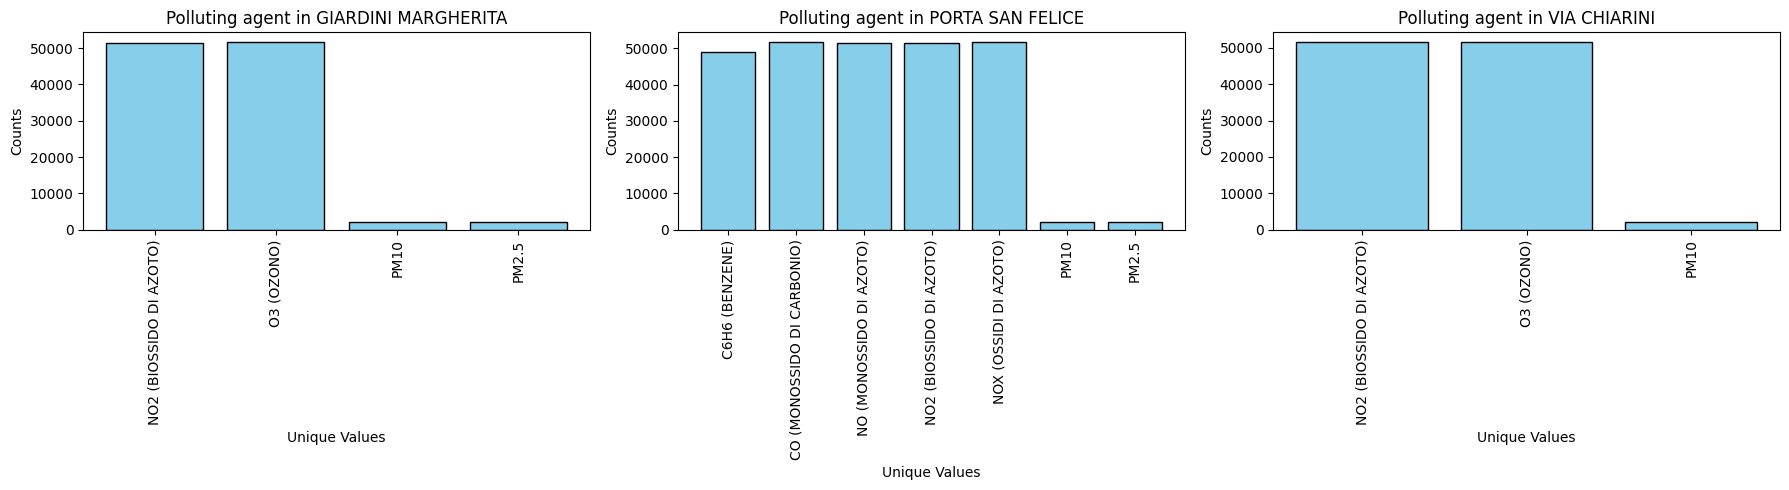

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, df in enumerate([giardini_df, san_felice_df, chiarini_df]):
    val, counts = np.unique(df['AGENTE'], return_counts=True)
    axes[i].bar(val, counts, color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_xticks(range(len(val)))
    axes[i].set_xticklabels(val, rotation=90)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Polluting agent in {df["COD_STAZ"].iloc[0]}')

plt.tight_layout()
plt.show()

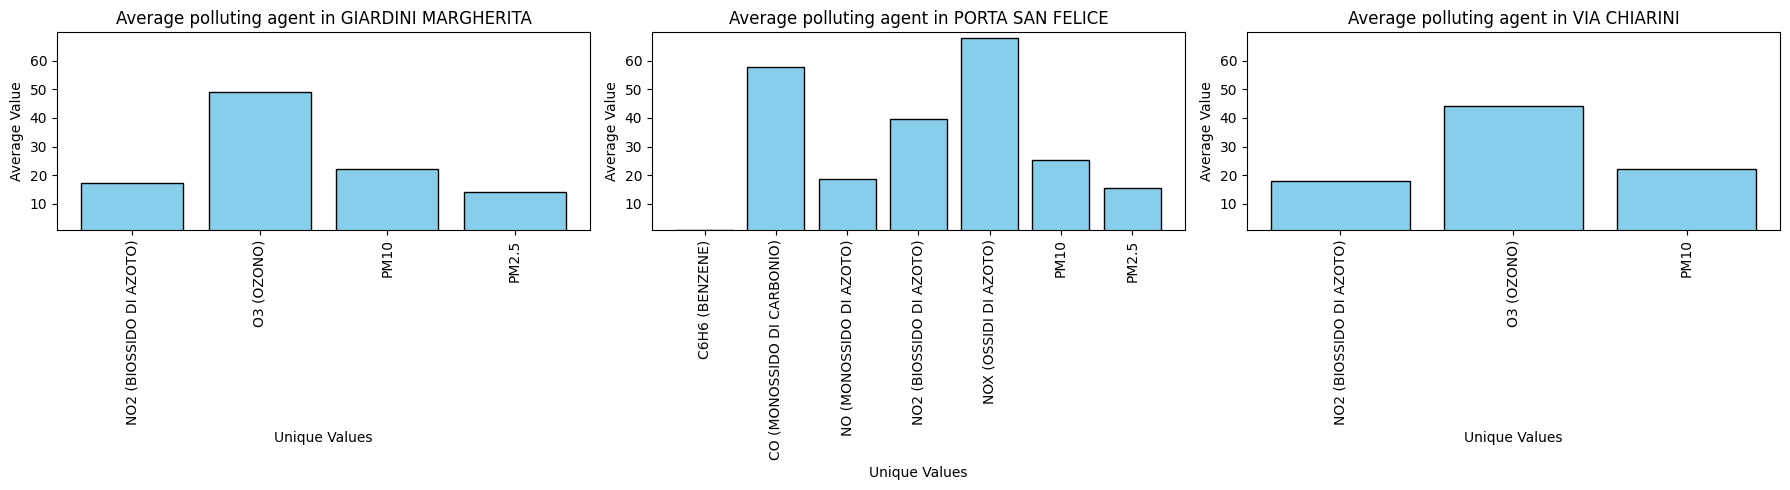

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Determine the global y-axis limits based on average values
y_min = min(df[df['AGENTE'] == agent]['VALORE'].mean() for df in [giardini_df, san_felice_df, chiarini_df] for agent in np.unique(df['AGENTE']))
y_max = max(df[df['AGENTE'] == agent]['VALORE'].mean() for df in [giardini_df, san_felice_df, chiarini_df] for agent in np.unique(df['AGENTE']))

for i, df in enumerate([giardini_df, san_felice_df, chiarini_df]):
    val = np.unique(df['AGENTE'])
    means = [df[df['AGENTE'] == agent]['VALORE'].mean() for agent in val]
    axes[i].bar(val, means, color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_xticks(range(len(val)))
    axes[i].set_xticklabels(val, rotation=90)
    axes[i].set_ylabel('Average Value')
    axes[i].set_title(f'Average polluting agent in {df["COD_STAZ"].iloc[0]}')
    axes[i].set_ylim(y_min, y_max+np.log10(y_max))

plt.tight_layout()
plt.show()

NO2 and O3 common to all the three stations, maybe good idea to consider just them? or maybe consider just Porta San Felice and use the first 4 agents.



# README

Sono tonto io o O3 non ci sta in san felice? no ok non ci sta

Comunque non lo so, perchè dato che si usa l'inquinante più alto, NOX lo è molto più in media... (leggi dopo)

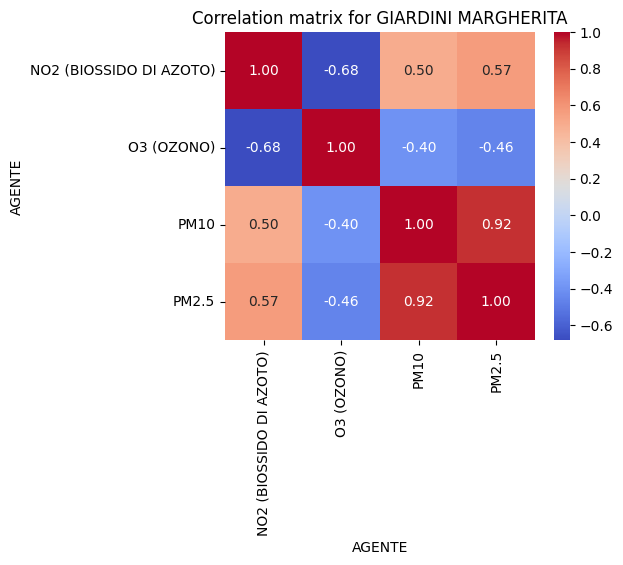

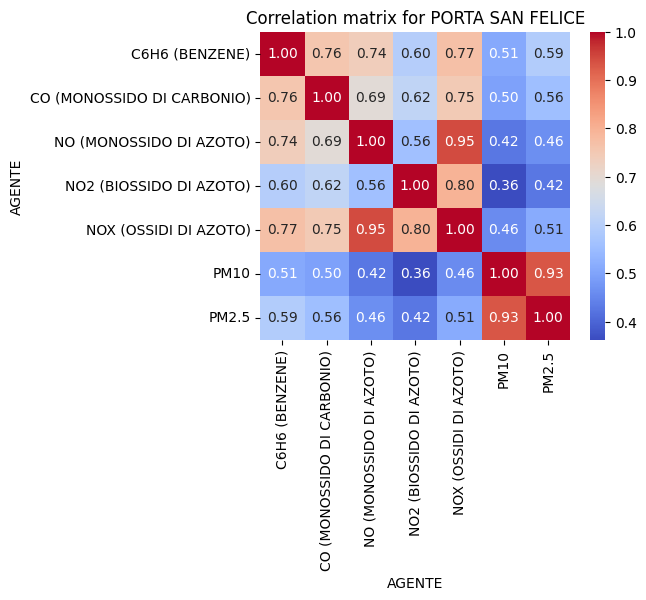

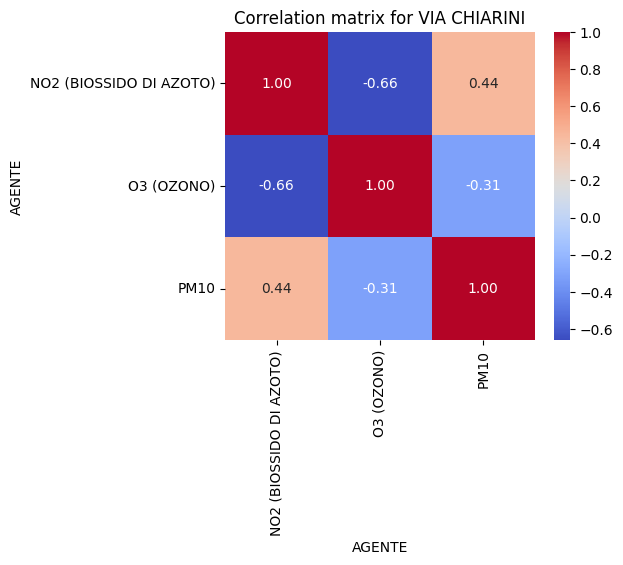

In [87]:
dfs = [giardini_df, san_felice_df, chiarini_df]

for df in dfs:
    corr_matrix = df.pivot_table(index='DATA_INIZIO', columns='AGENTE', values='VALORE').corr()
    plt.figure(figsize=(5, 4))
    plt.title(f'Correlation matrix for {df["COD_STAZ"].iloc[0]}')
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

# README

bhe ci sono un paio di cose molto correlate, forse si potrebbero unire, tipo prendendo il max delle due per ogni giorno.

"NOx è una sigla generica che identifica collettivamente tutti gli ossidi di azoto e le loro miscele."
No e NO2 non sono molto correlati, ma entrambi sono molto correlati a NOx

Secondo me bisogna capire se servirà fare tutta quella roba strana che faceva il prof per capire quali fossero le colonne utili, tutti quei conti incomprensibili. Oppure, se ci basta essere più generici qui, dato che alla fine è il target, dato che vogliamo predirre l'inquinamento. Forse con il meteo sarà più importante capire lel colonne utili e con il traffico capire come gestire le spire


### Measurements display

#### One week of measurements

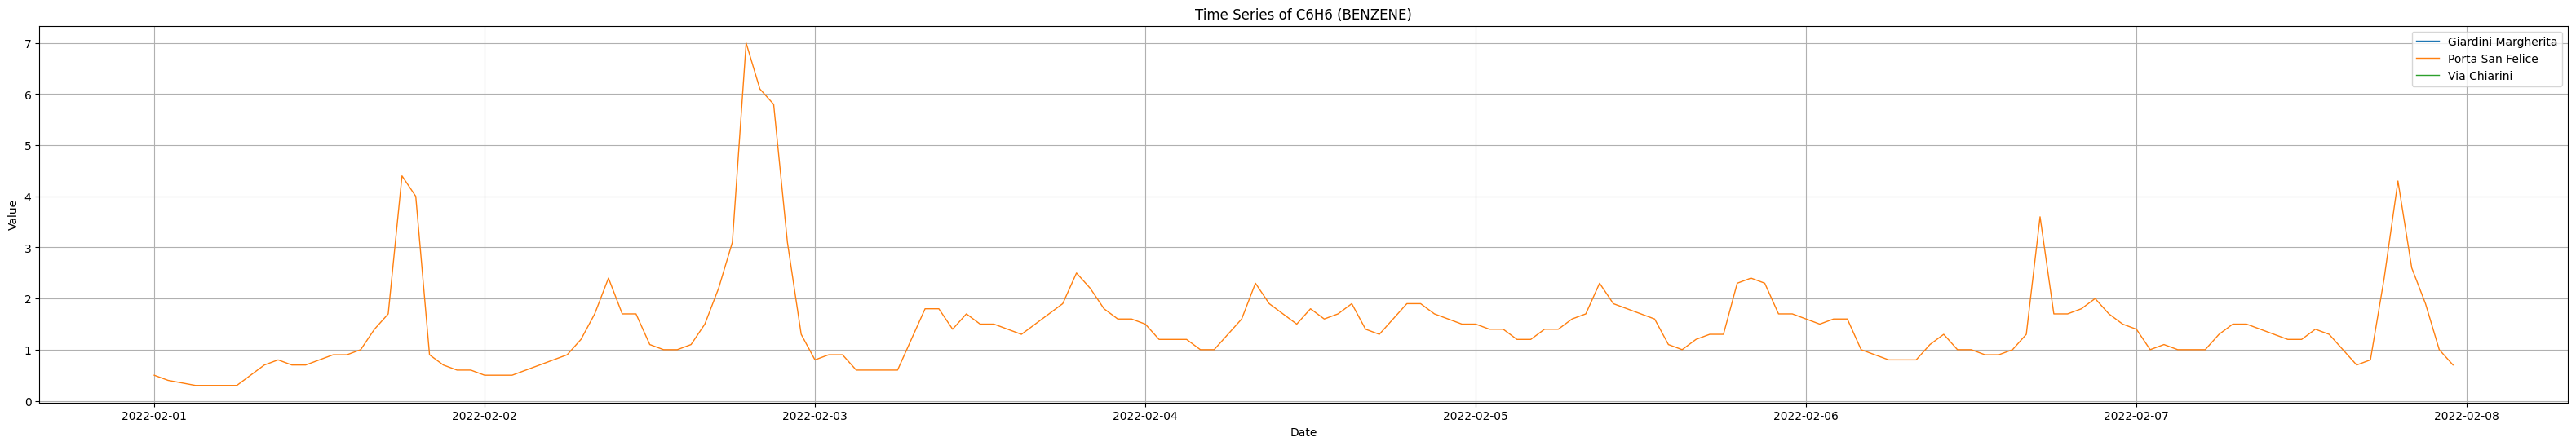

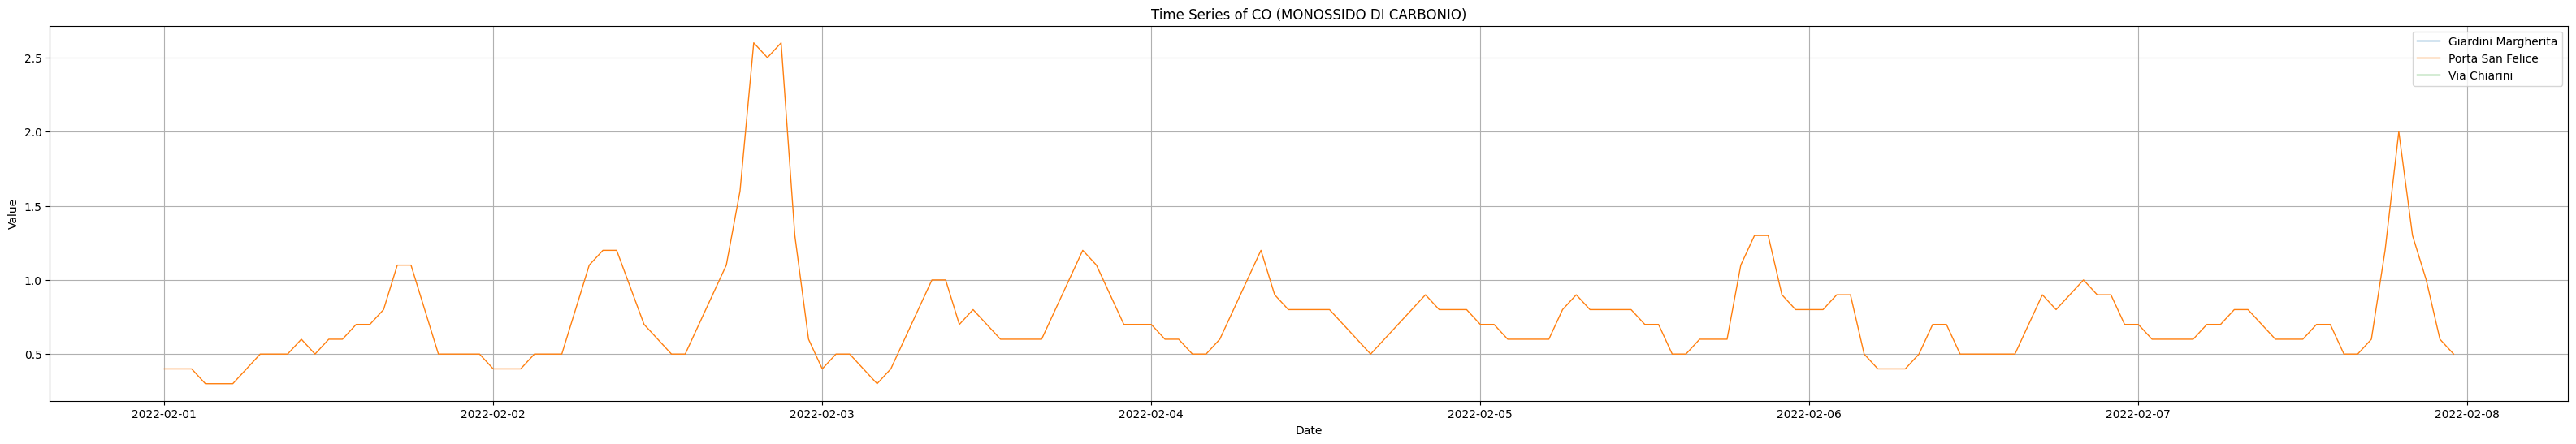

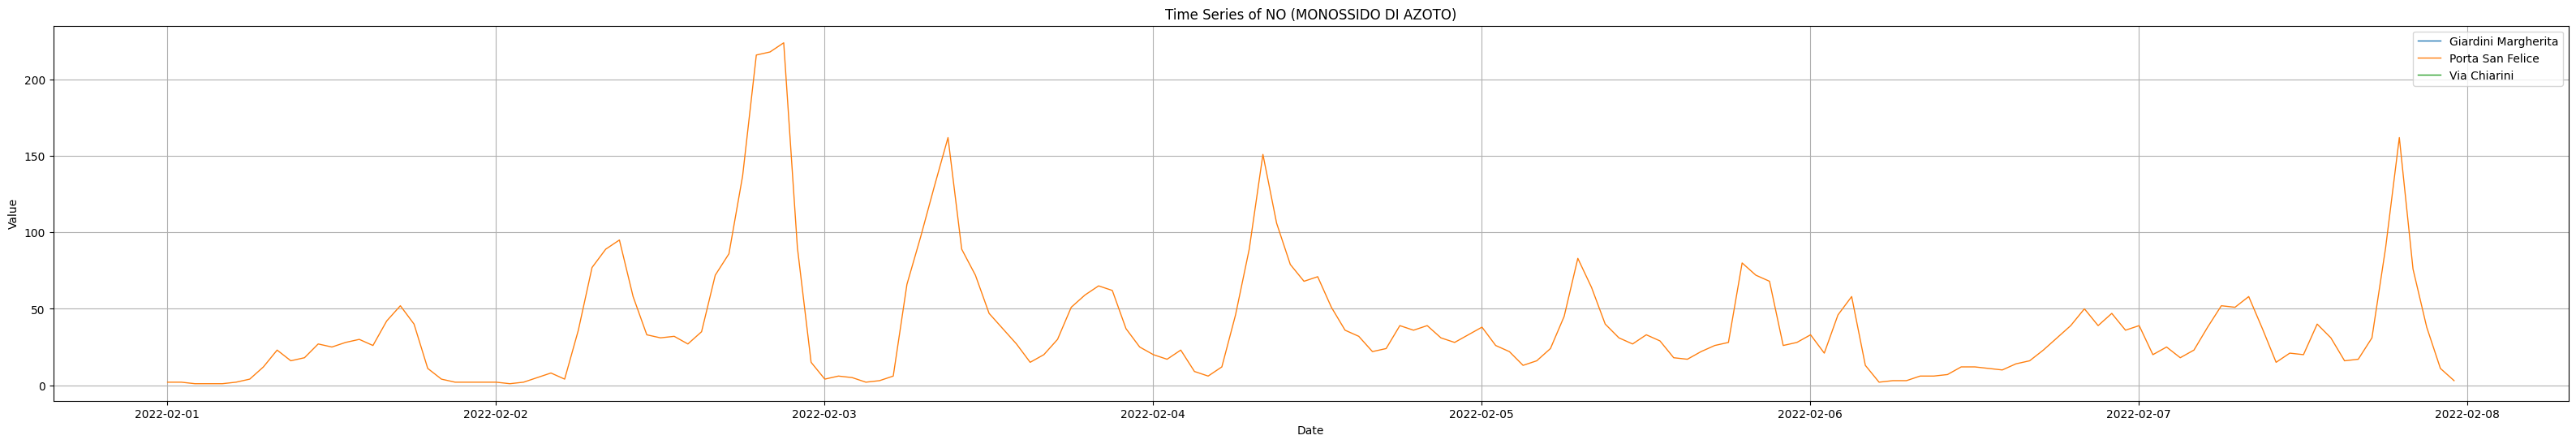

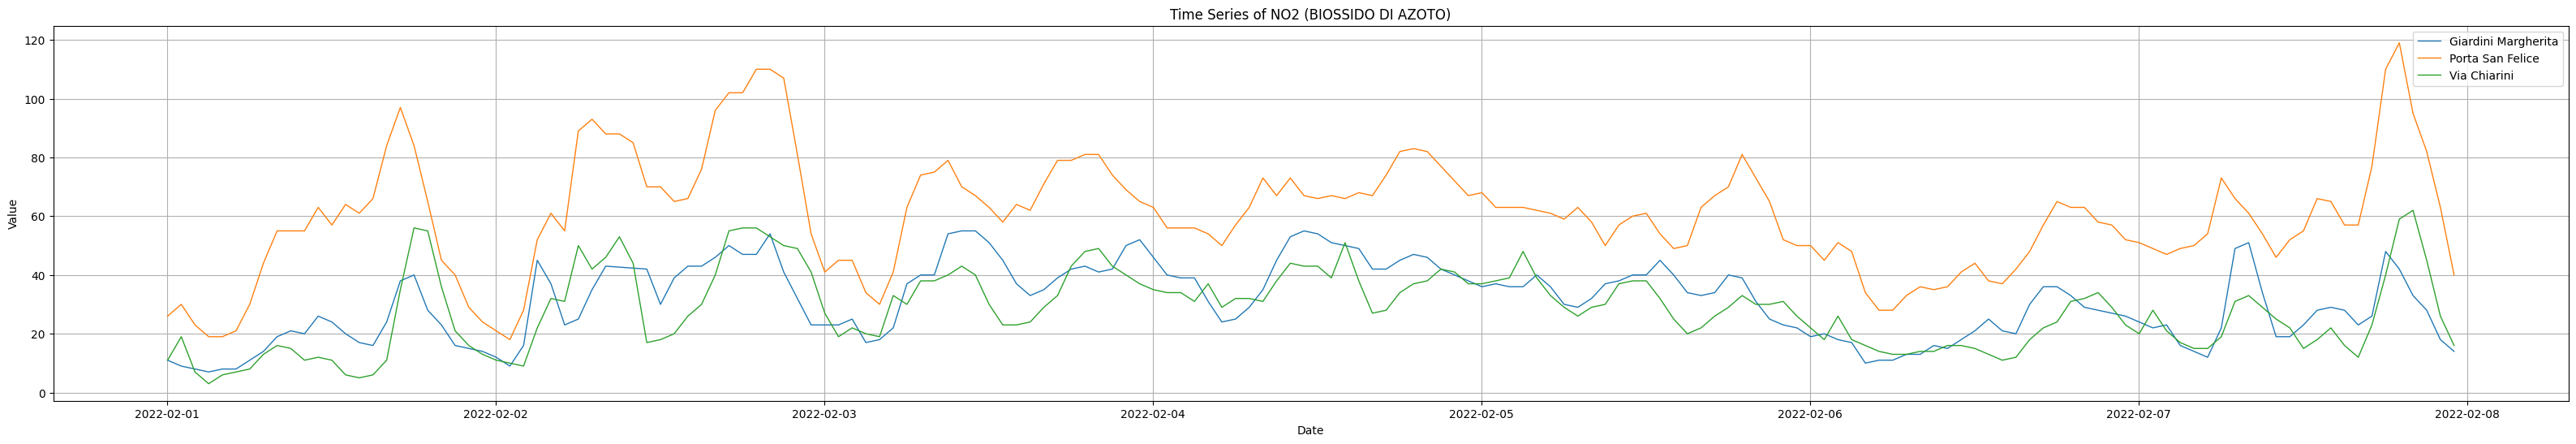

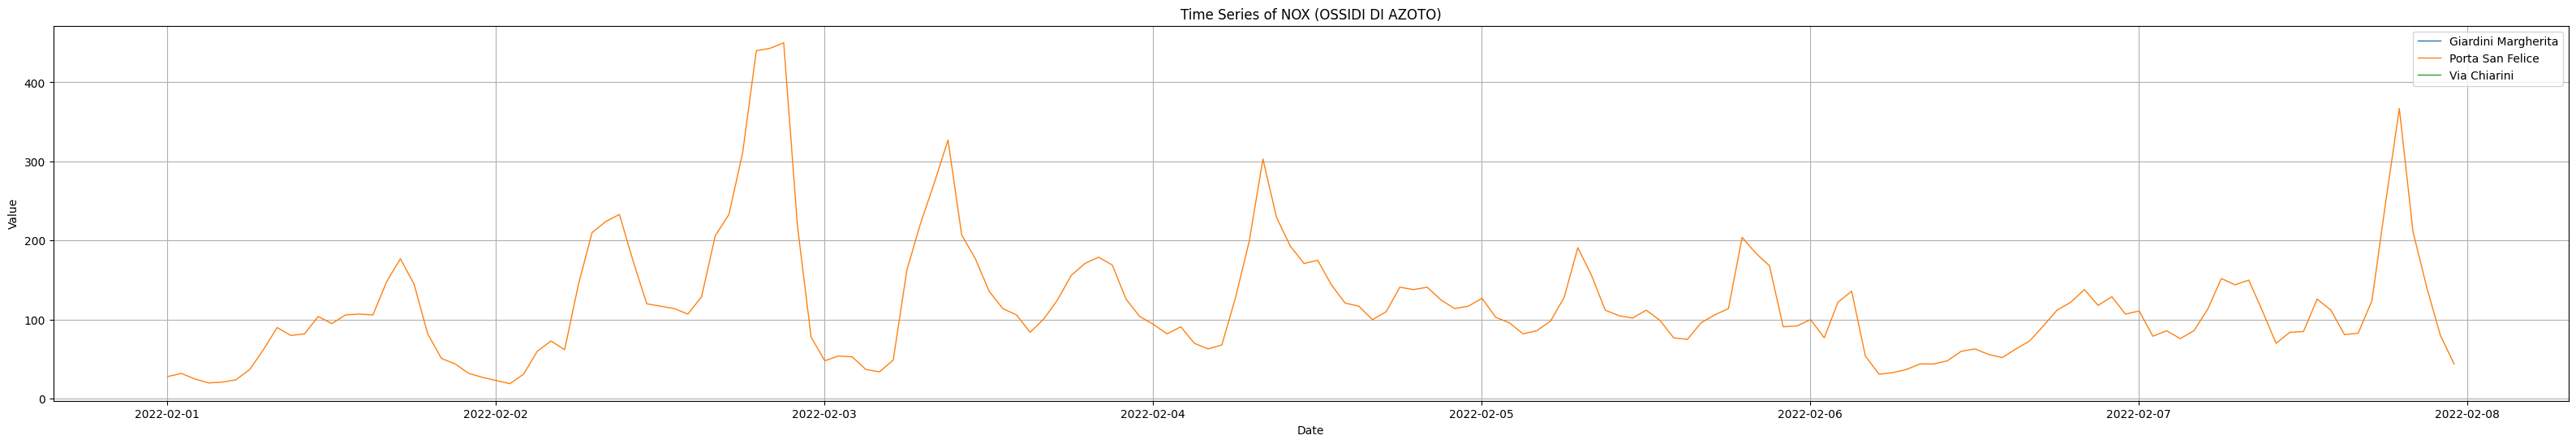

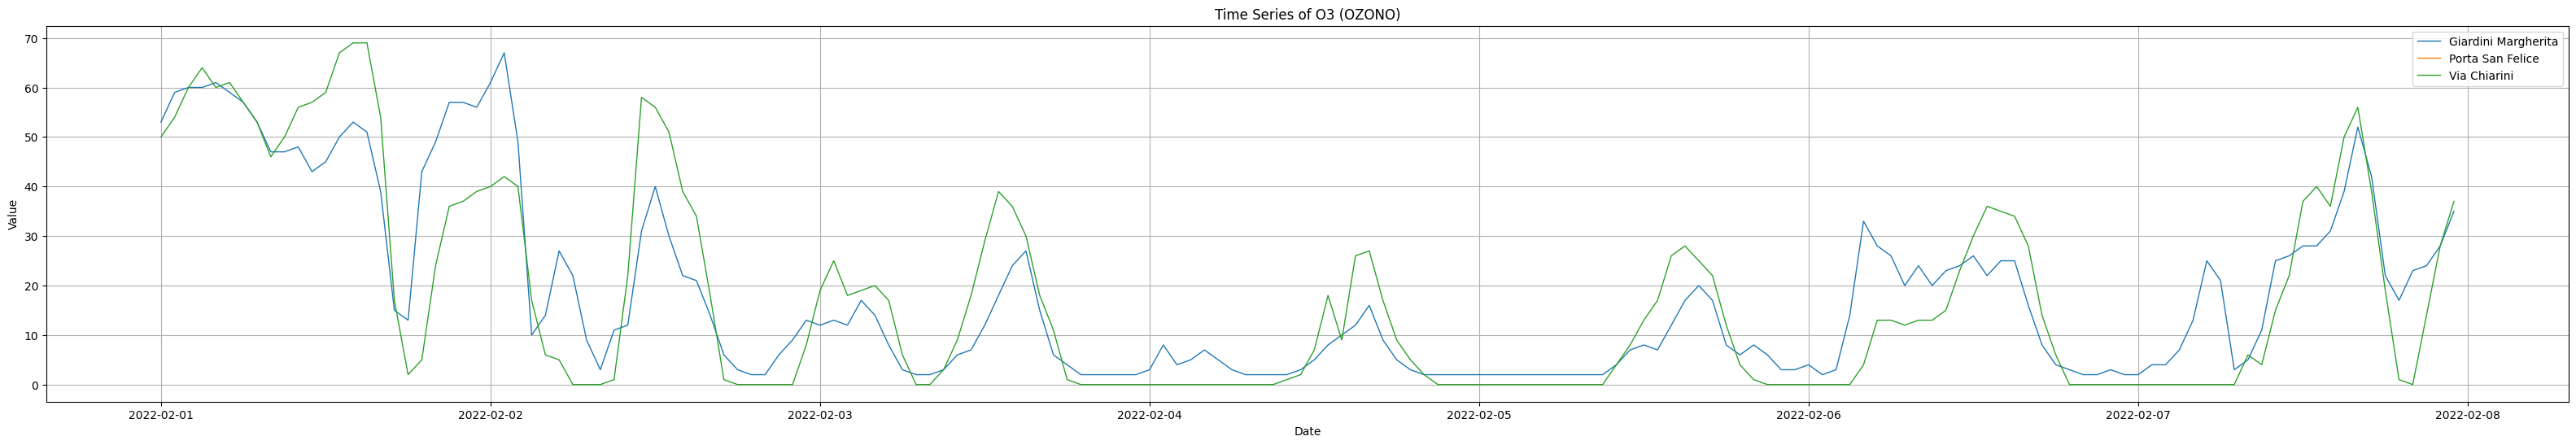

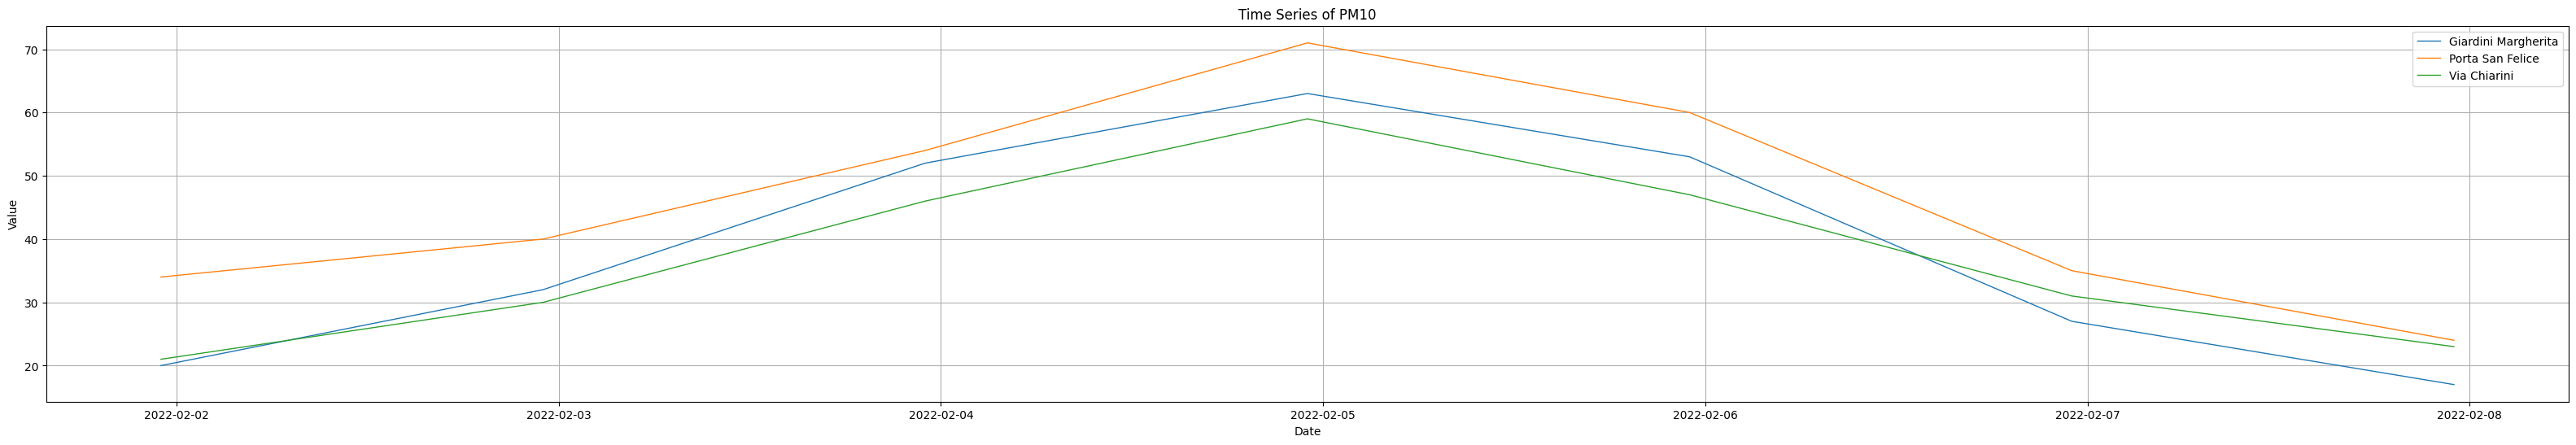

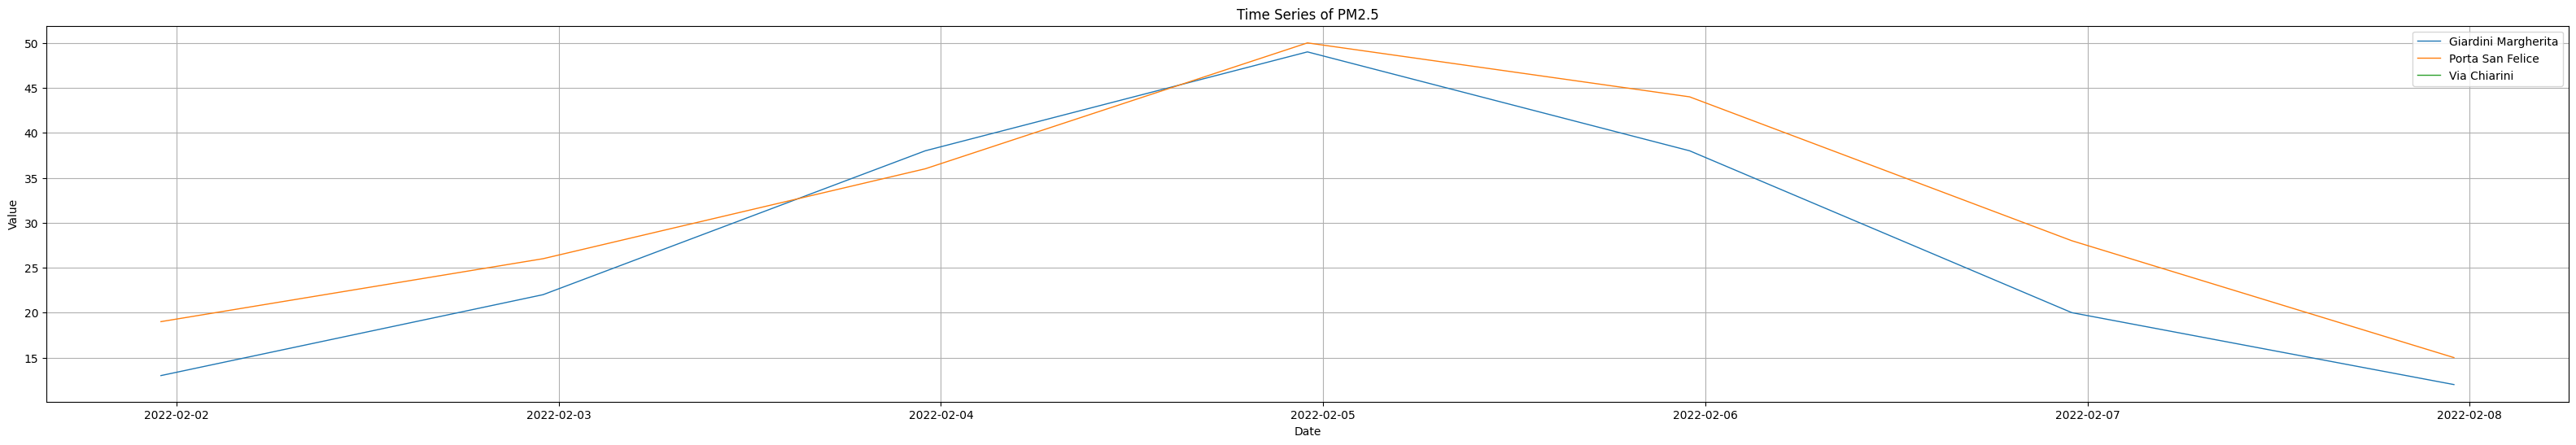

In [88]:
start_date = datetime(2022, 2, 1)
end_date = datetime(2022, 2, 8)

unique_agents = np.unique(air_pollution_df['AGENTE'])
for agent in unique_agents:
    plot_time_series([giardini_df[giardini_df['AGENTE'] == agent], san_felice_df[san_felice_df['AGENTE'] == agent], chiarini_df[chiarini_df['AGENTE'] == agent]], 'VALORE', 'DATA_INIZIO',legends=['Giardini Margherita','Porta San Felice', 'Via Chiarini'], start_date=start_date, end_date=end_date, title=agent)

#### One month of measurements

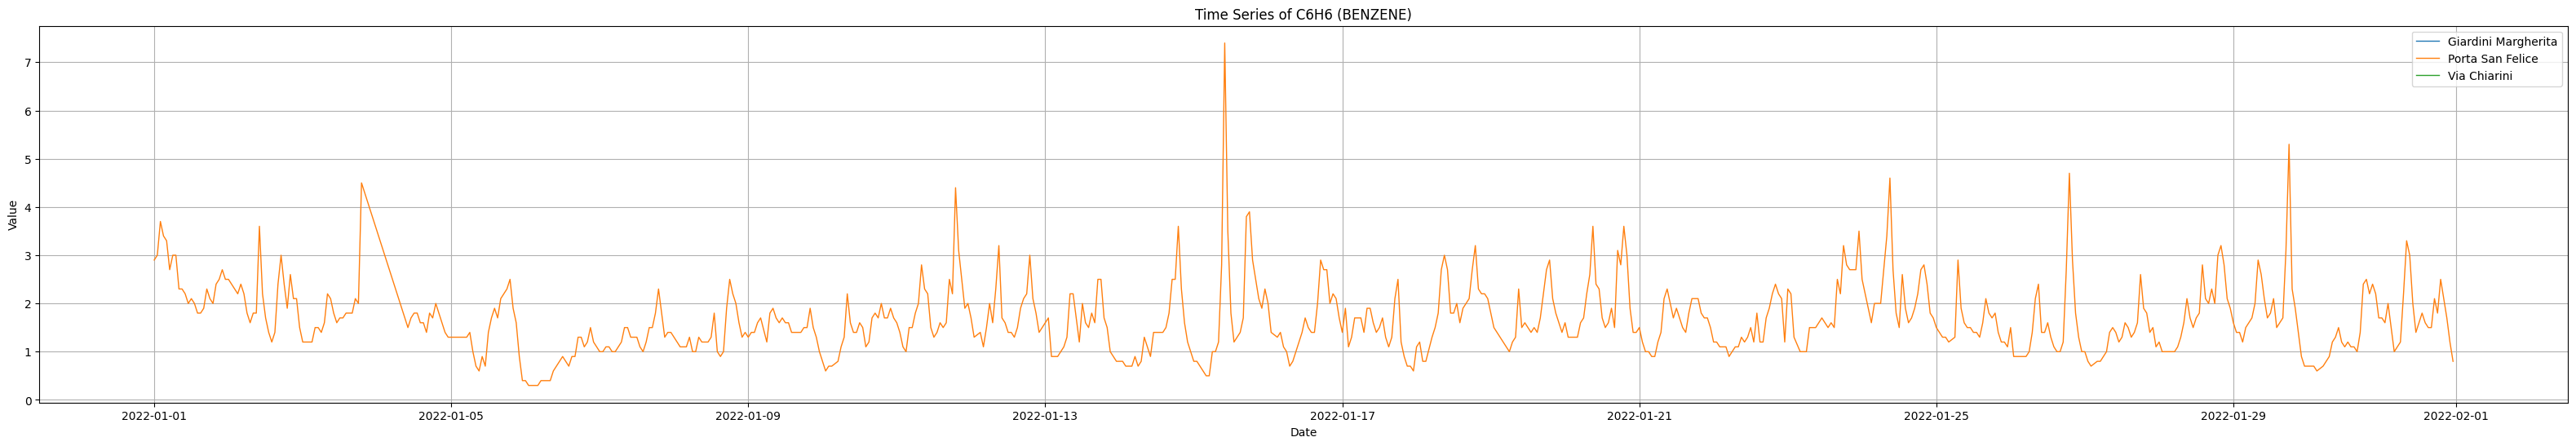

KeyboardInterrupt: 

In [89]:
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 2, 1)

unique_agents = np.unique(air_pollution_df['AGENTE'])
for agent in unique_agents:
    plot_time_series([giardini_df[giardini_df['AGENTE'] == agent], san_felice_df[san_felice_df['AGENTE'] == agent], chiarini_df[chiarini_df['AGENTE'] == agent]], 'VALORE', 'DATA_INIZIO',legends=['Giardini Margherita','Porta San Felice', 'Via Chiarini'], start_date=start_date, end_date=end_date, title=agent)

#### One year of measurements

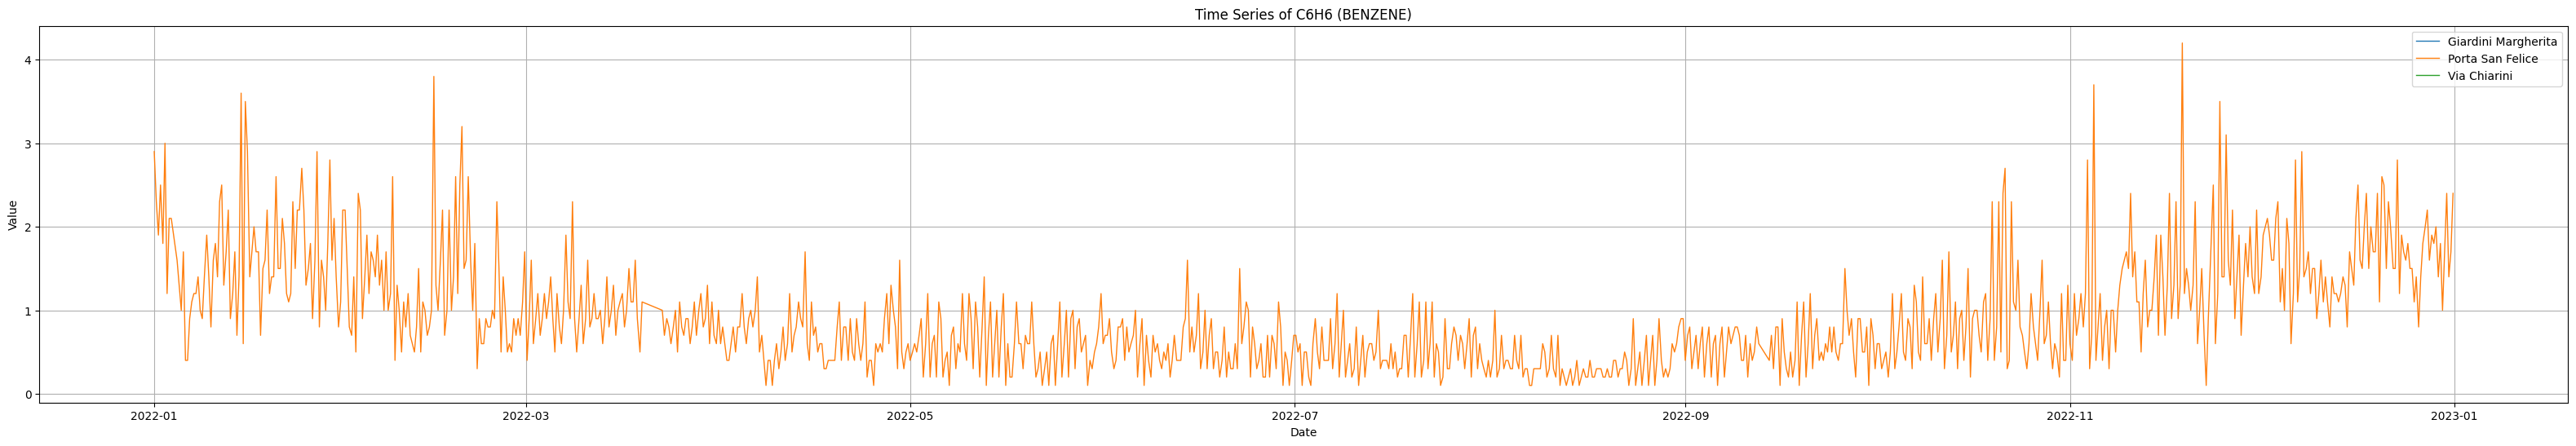

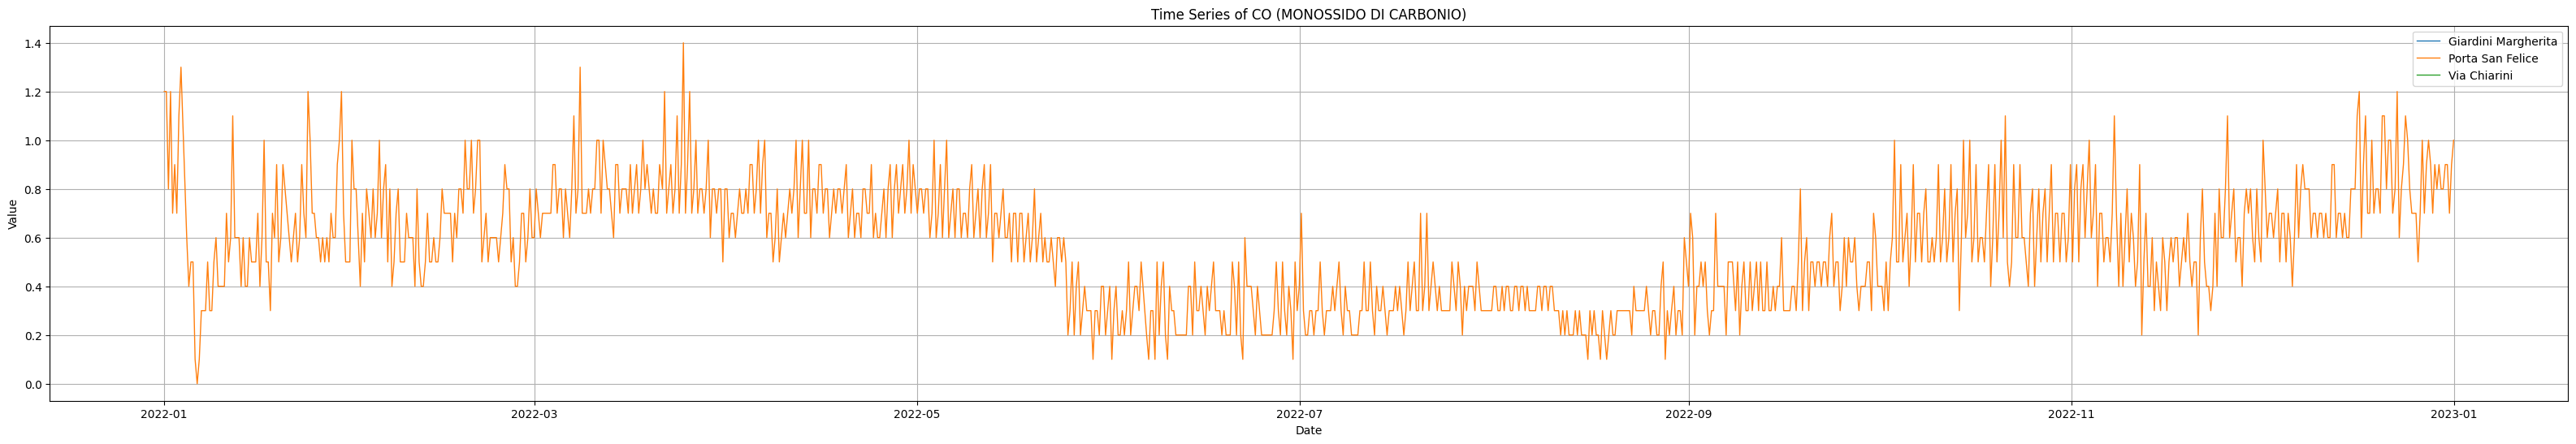

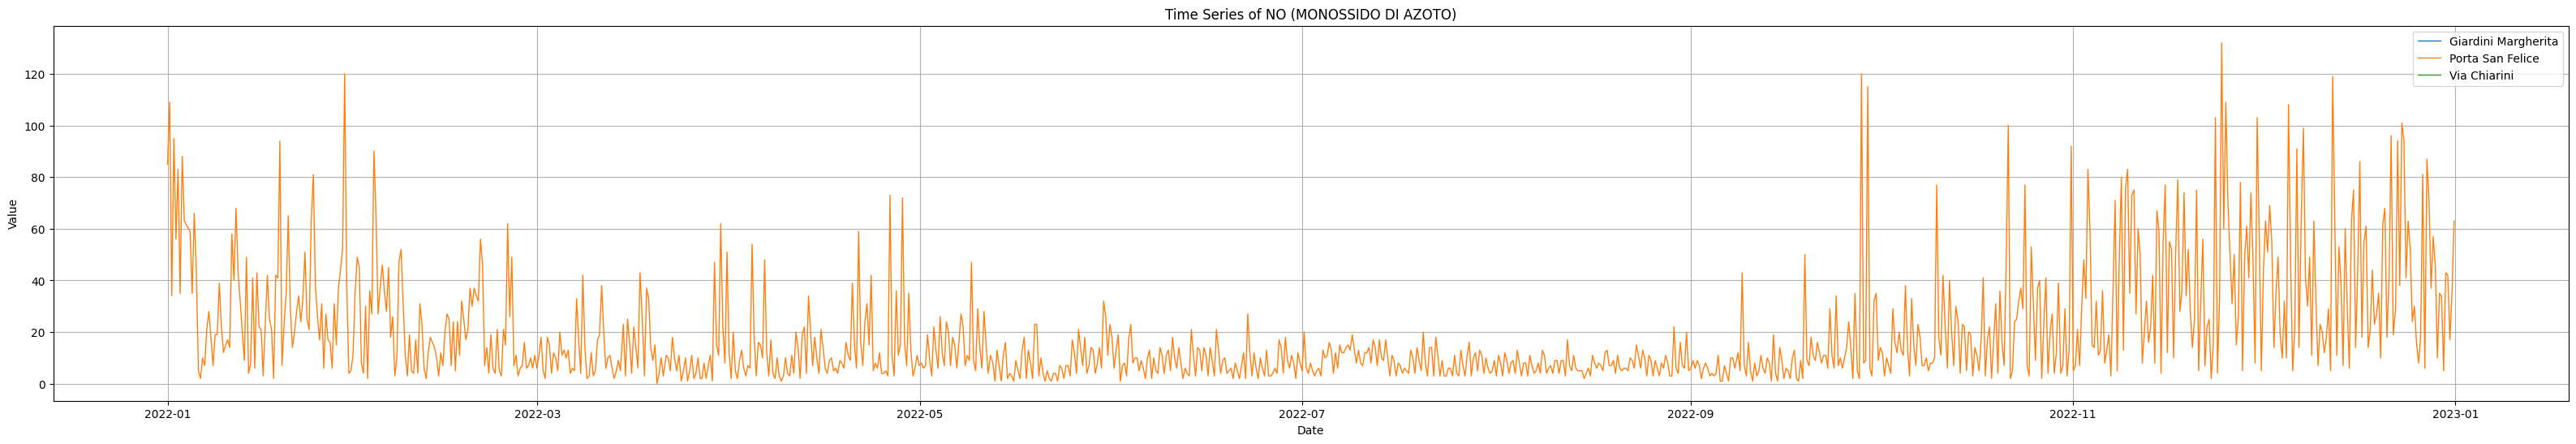

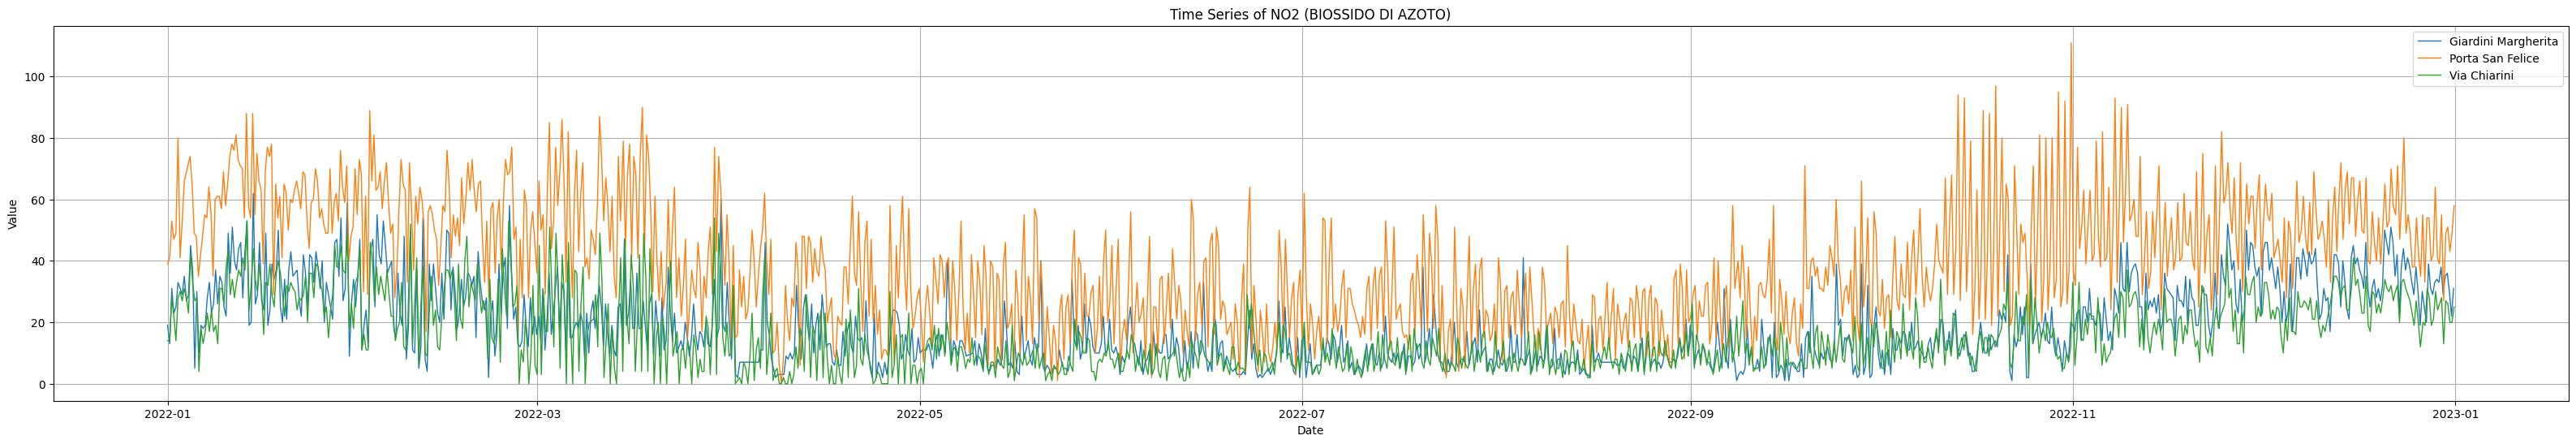

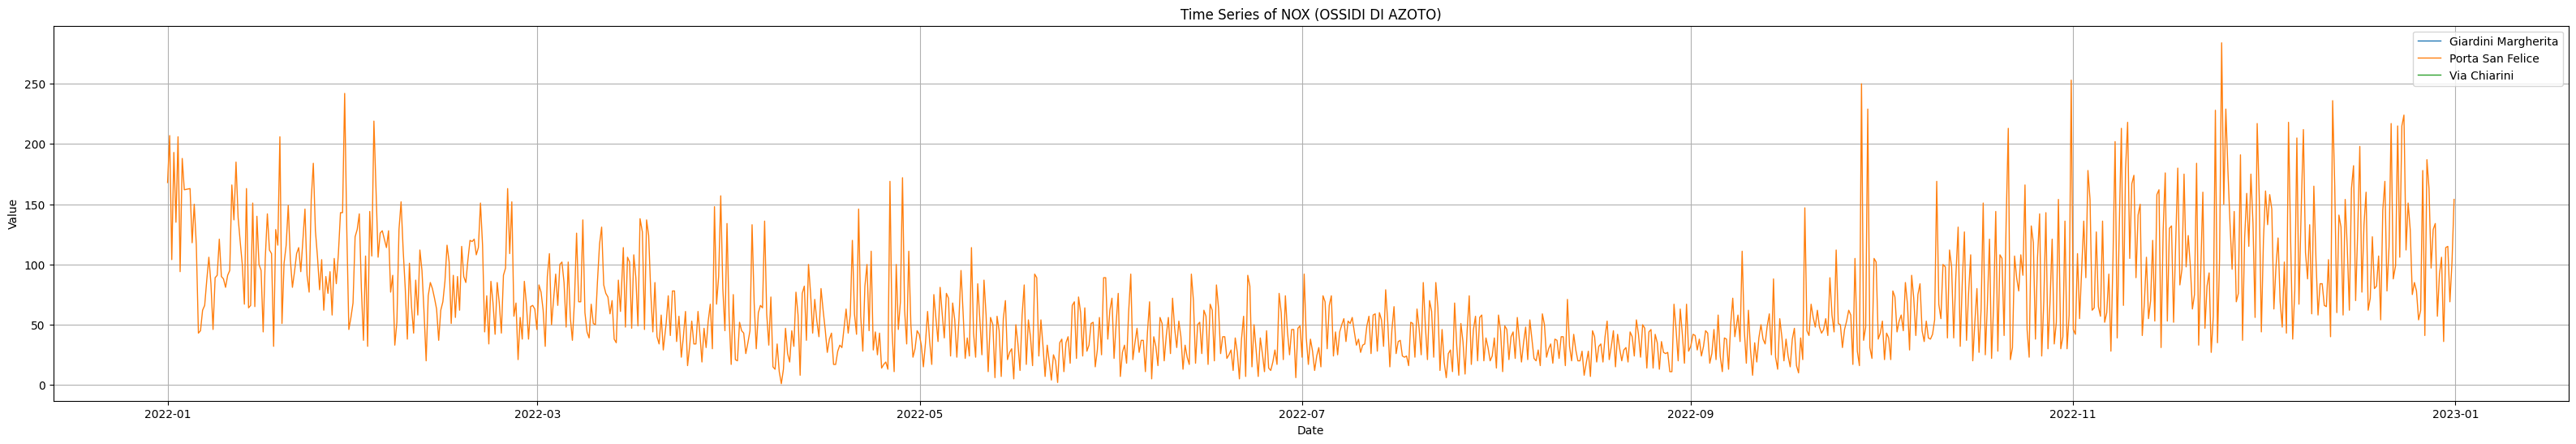

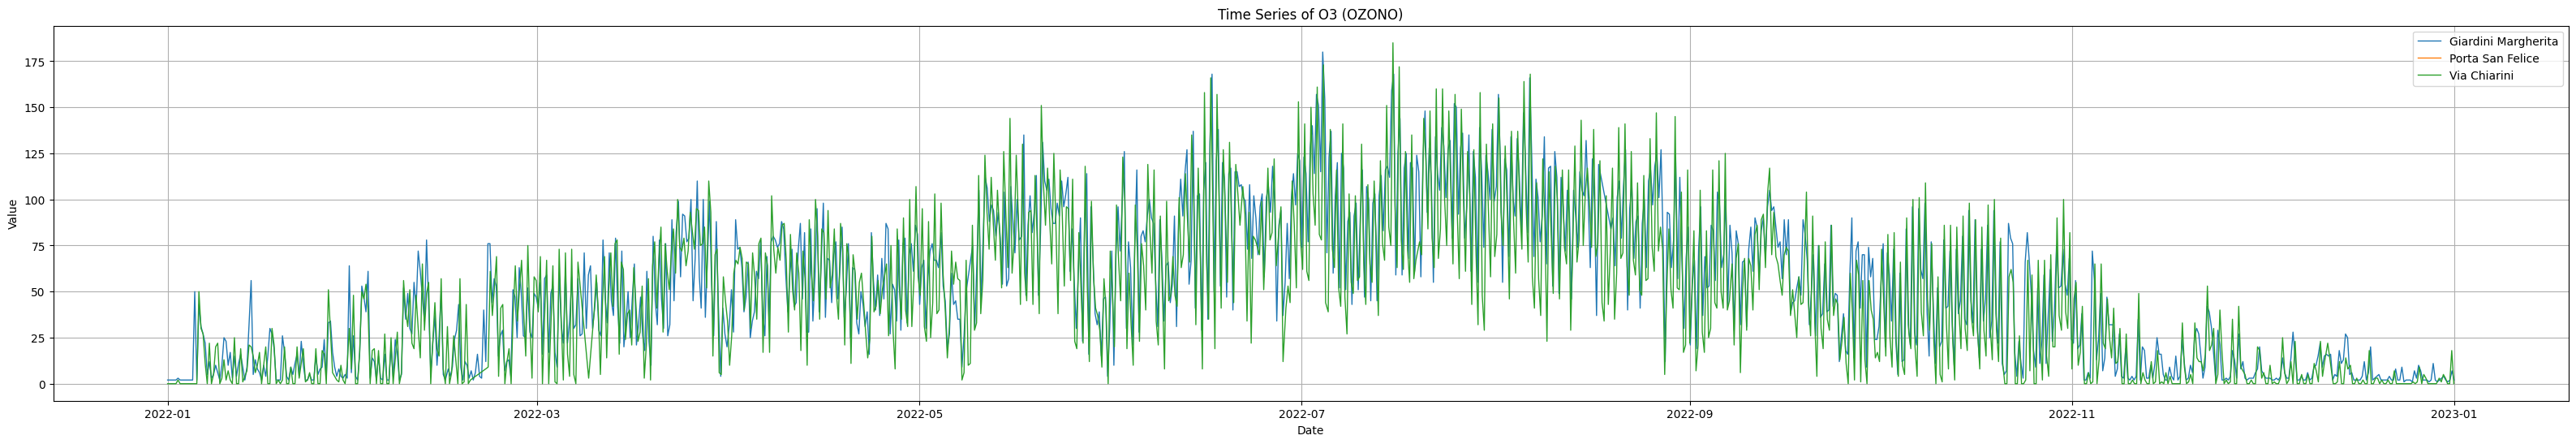

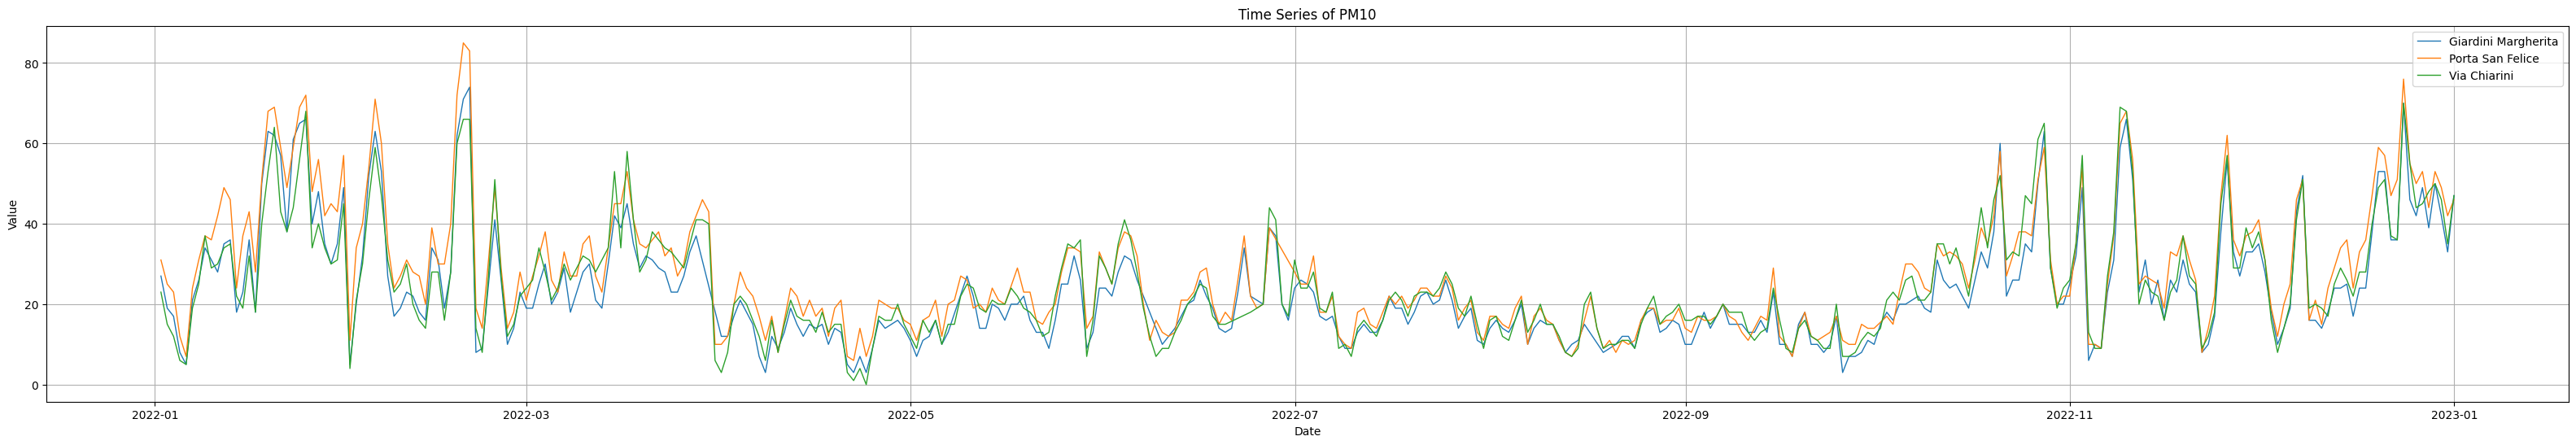

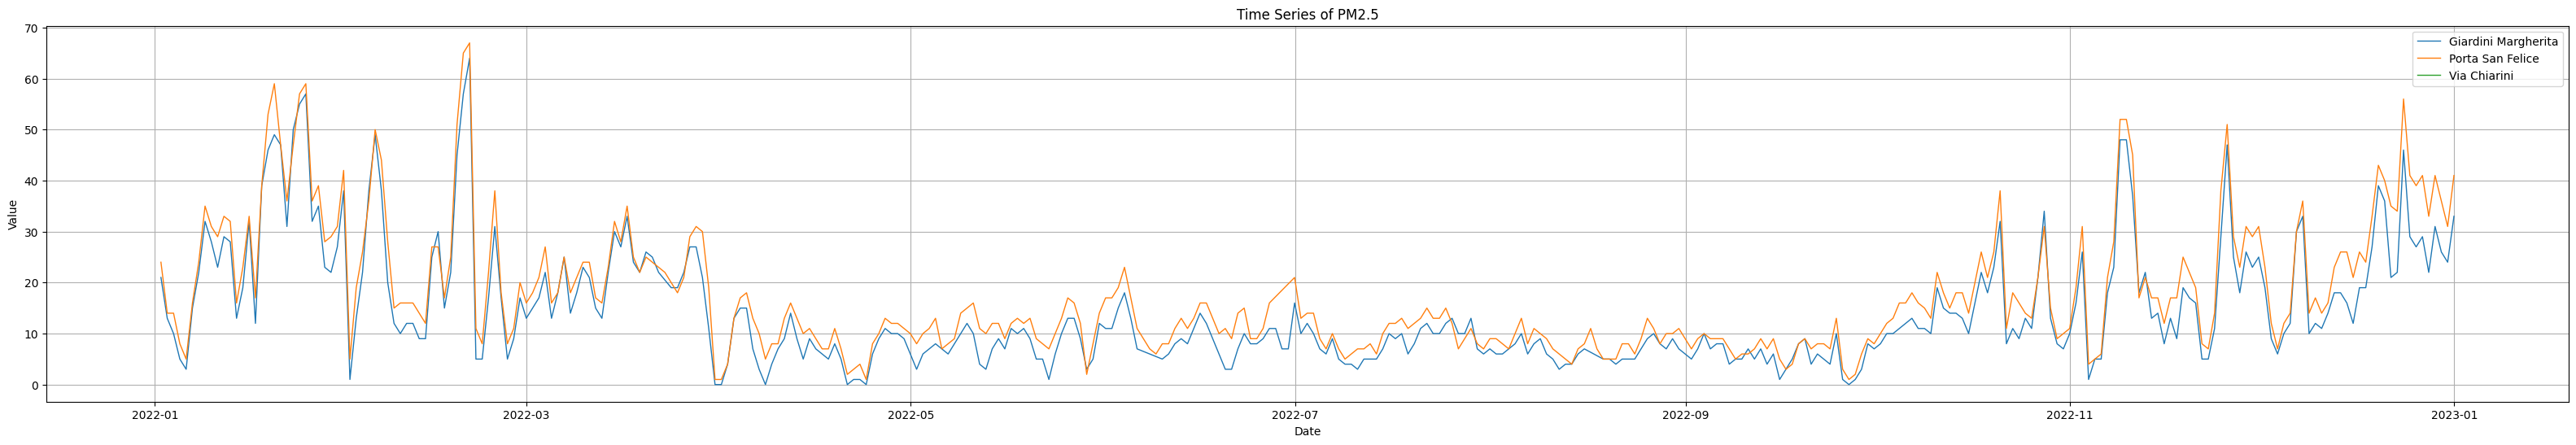

In [ ]:
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

unique_agents = np.unique(air_pollution_df['AGENTE'])
for agent in unique_agents:
    plot_time_series([giardini_df[giardini_df['AGENTE'] == agent], san_felice_df[san_felice_df['AGENTE'] == agent], chiarini_df[chiarini_df['AGENTE'] == agent]], 'VALORE', 'DATA_INIZIO',legends=['Giardini Margherita','Porta San Felice', 'Via Chiarini'], start_date=start_date, end_date=end_date, title=agent)

#### Multiple years of Measurements

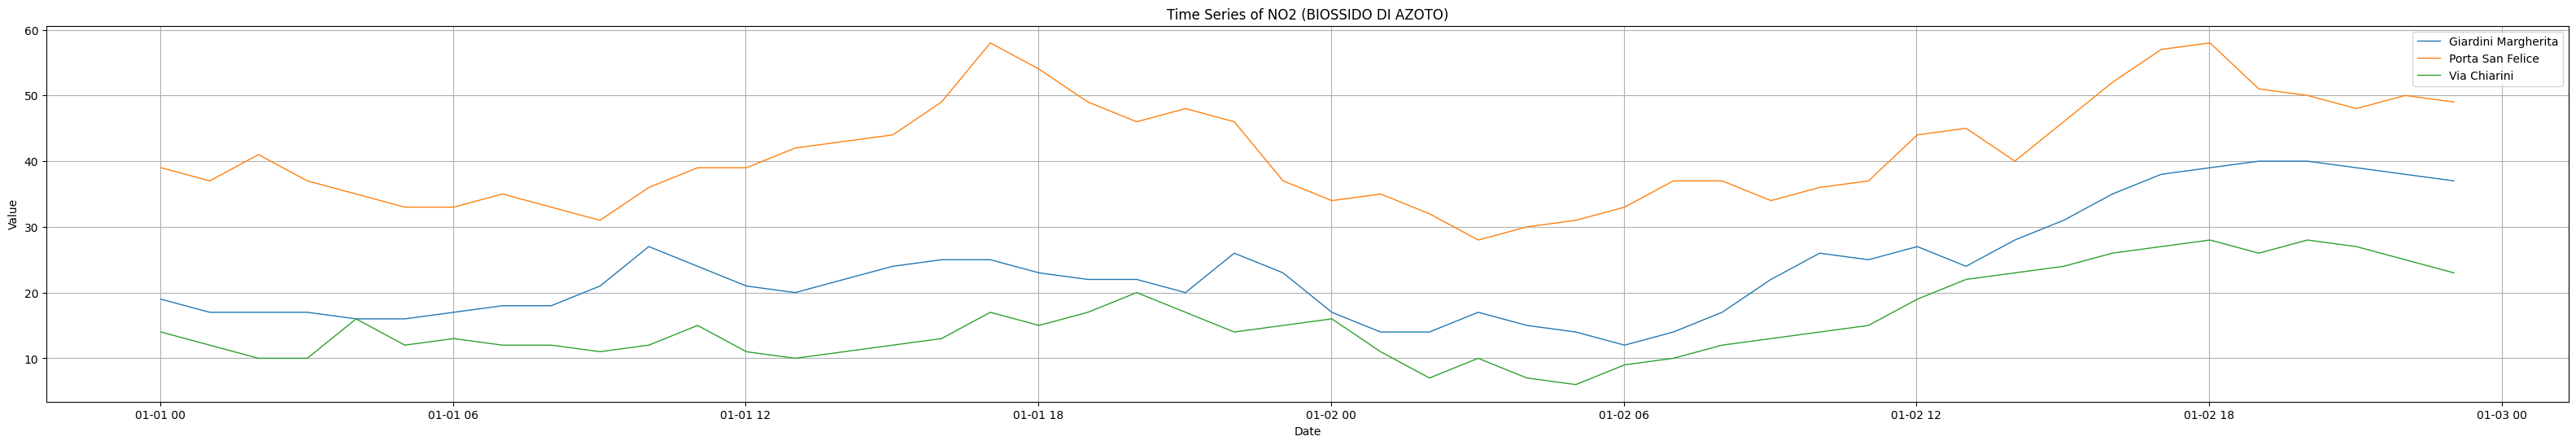

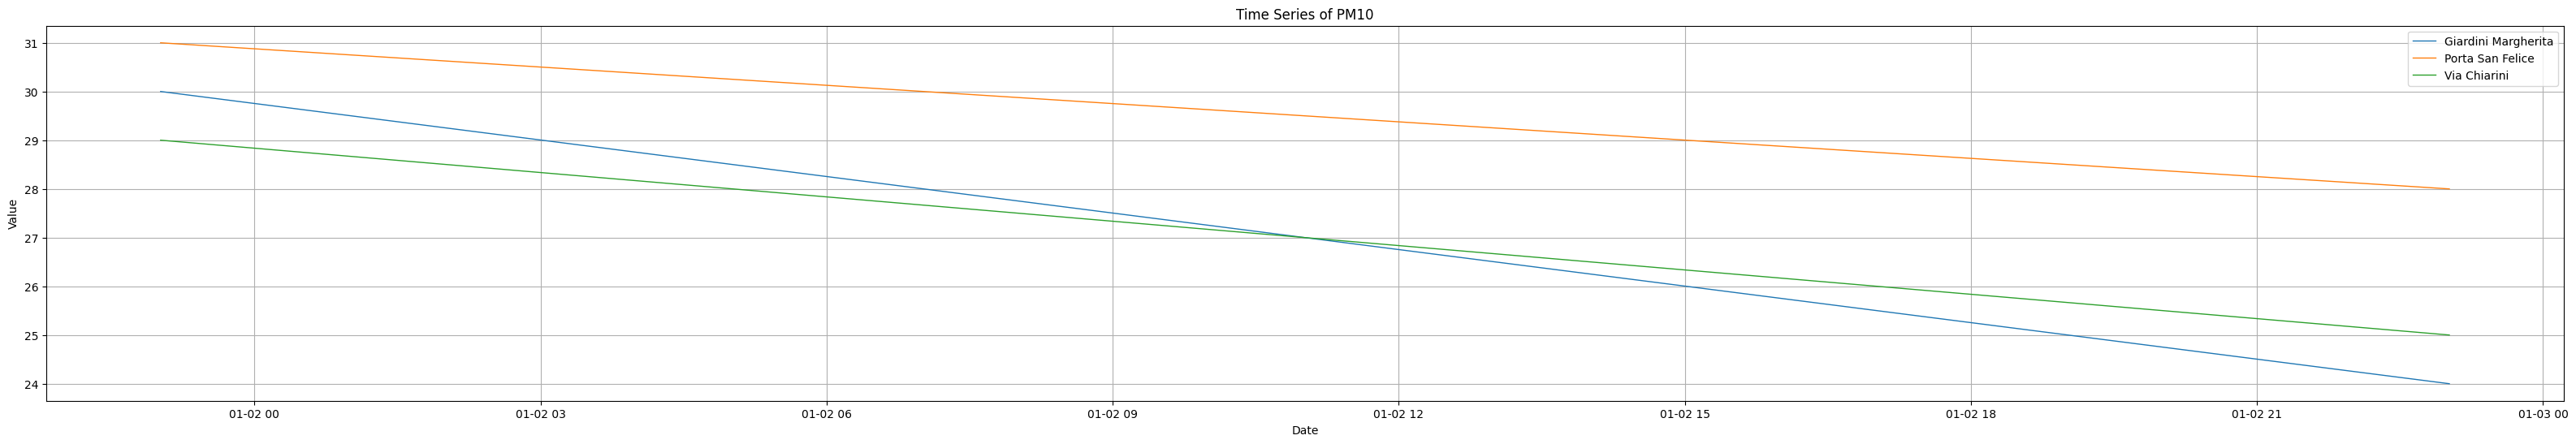

In [141]:
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 3)

unique_agents = np.unique(air_pollution_df['AGENTE'])
for agent in unique_agents:
    if agent in('NO2 (BIOSSIDO DI AZOTO)','PM10'):
        plot_time_series([giardini_df[giardini_df['AGENTE'] == agent], san_felice_df[san_felice_df['AGENTE'] == agent], chiarini_df[chiarini_df['AGENTE'] == agent]], 'VALORE', 'DATA_INIZIO',legends=['Giardini Margherita','Porta San Felice', 'Via Chiarini'], start_date=start_date, end_date=end_date, title=agent)

start_date = datetime(2022, 1, 1)
end_date = datetime(2025, 1, 1)

unique_agents = np.unique(air_pollution_df['AGENTE'])
for agent in unique_agents:
    plot_time_series([giardini_df[giardini_df['AGENTE'] == agent], san_felice_df[san_felice_df['AGENTE'] == agent], chiarini_df[chiarini_df['AGENTE'] == agent]], 'VALORE', 'DATA_INIZIO',legends=['Giardini Margherita','Porta San Felice', 'Via Chiarini'], start_date=start_date, end_date=end_date, title=agent)

mi viene da dire che il PM si possa quasi droppare idk

### Target Dataset

# README

Poi certo, magari si riesce anche a prevedere quale inquinante sarà presente... però intanto proviamo a cercare se in generale trova inquinanti... Provo a creare un dataset con il max inquinante per ogni ora per avere un target.

In [ ]:
# quite slow
max_hour_per_station_df = air_pollution_df.groupby(['DATA_INIZIO', 'COD_STAZ']).apply(lambda x: x.loc[x['VALORE'].idxmax()]).reset_index(drop=True)

KeyboardInterrupt: 

In [ ]:
max_hour_per_station_df.head(3)

COD_STAZ                 AGENTE         DATA_INIZIO  \
0  GIARDINI MARGHERITA                   PM10 2018-12-31 23:01:00   
1     PORTA SAN FELICE  NOX (OSSIDI DI AZOTO) 2018-12-31 23:01:00   
2         VIA CHIARINI                   PM10 2018-12-31 23:01:00   

            DATA_FINE  VALORE     UM  
0 2019-01-01 23:00:00    50.0  ug/m3  
1 2019-01-01 00:00:00   189.0  ug/m3  
2 2019-01-01 23:00:00    52.0  ug/m3

# README 
come fa ad esserci il 2018? sul csv non c'è. forsse qualche conversione di data?

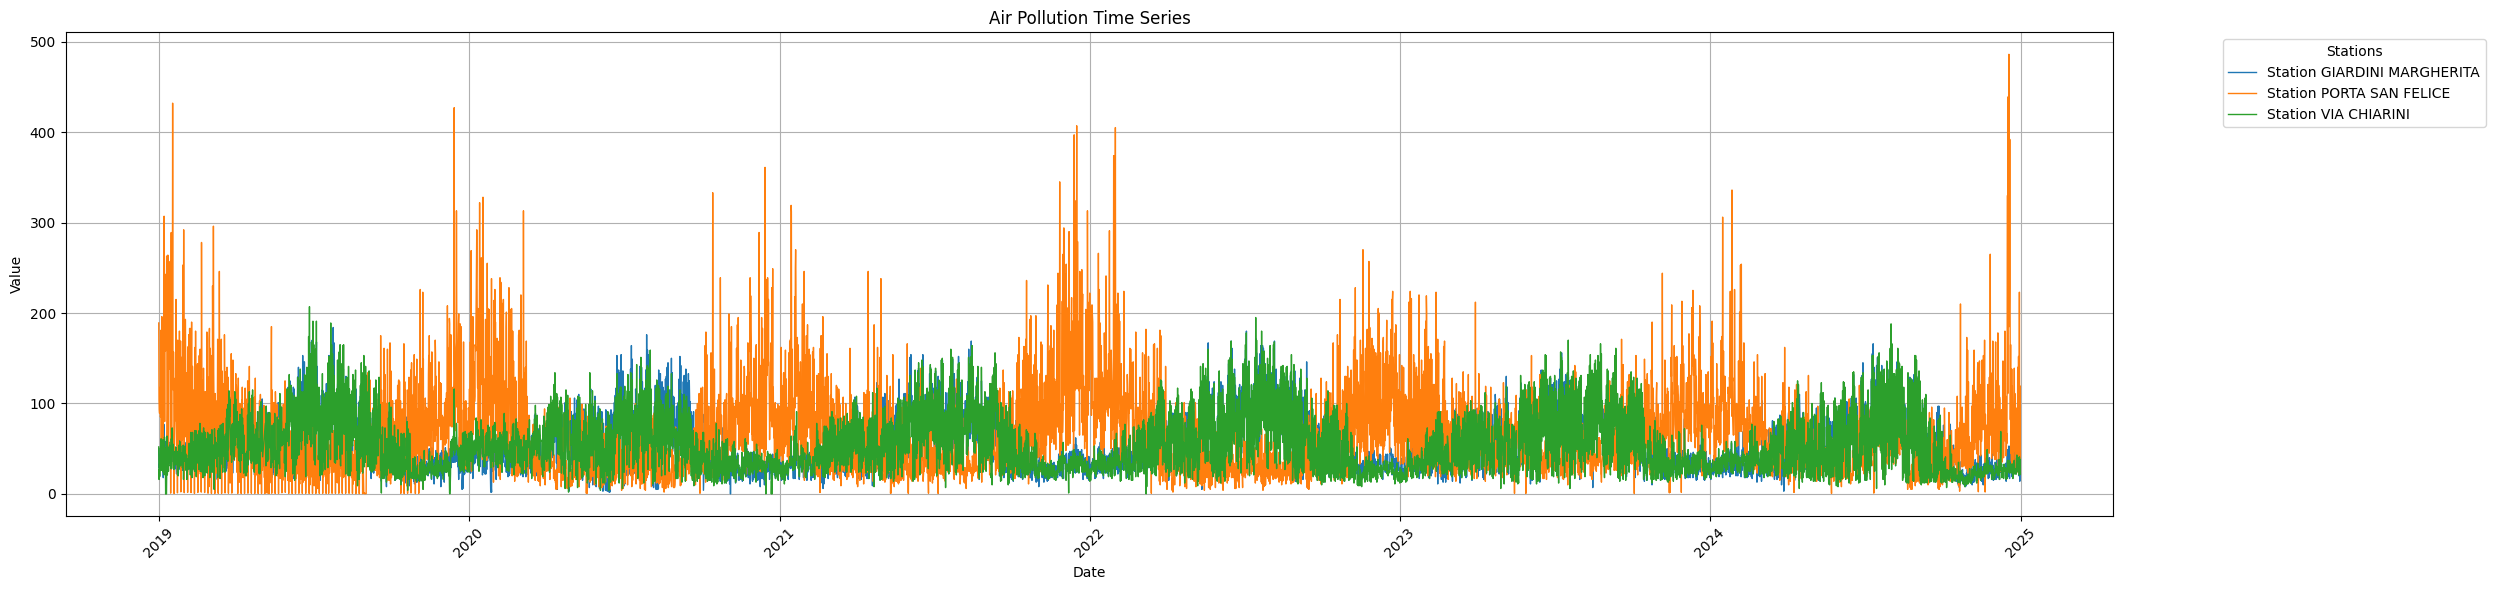

In [ ]:
plot_time_series_per_station(max_hour_per_station_df, 'VALORE', 'DATA_INIZIO','COD_STAZ')

sembrerebbe che le stazioni verdi e blu si sovrappongono molto bene e poi sono complementari con l'altra. Forse a sto punto ha senso mettere tutto assieme...

Alla fine hai le stazioni chiarini e margherita che sono super distanti ma hanno lo stesso andamento, quindi vuol dire che più di tanto l'aria non cambia? Inoltre da risultati diversi da san felice però ha anche metriche diverse forse

In [ ]:
stations = np.unique(max_hour_per_station_df['COD_STAZ'])

for s in stations:
    print('--------')
    print(f'Station {s}:')
    print(max_hour_per_station_df[max_hour_per_station_df['COD_STAZ']==s]['AGENTE'].value_counts())

--------
Station GIARDINI MARGHERITA:
AGENTE
O3 (OZONO)                 36063
NO2 (BIOSSIDO DI AZOTO)    15679
PM10                         466
PM2.5                         20
Name: count, dtype: int64
--------
Station PORTA SAN FELICE:
AGENTE
NOX (OSSIDI DI AZOTO)         51042
C6H6 (BENZENE)                  430
PM10                            407
NO2 (BIOSSIDO DI AZOTO)         231
CO (MONOSSIDO DI CARBONIO)      221
NO (MONOSSIDO DI AZOTO)           3
PM2.5                             1
Name: count, dtype: int64
--------
Station VIA CHIARINI:
AGENTE
O3 (OZONO)                 33662
NO2 (BIOSSIDO DI AZOTO)    17889
PM10                         455
Name: count, dtype: int64


In [ ]:
max_per_hour_overall_df = max_hour_per_station_df.loc[max_hour_per_station_df.groupby('DATA_INIZIO')['VALORE'].idxmax()].reset_index(drop=True)
max_per_hour_overall_df.describe(include='all')

COD_STAZ                 AGENTE  \
count              52601                  52601   
unique                 3                      5   
top     PORTA SAN FELICE  NOX (OSSIDI DI AZOTO)   
freq               27099                  27044   
mean                 NaN                    NaN   
min                  NaN                    NaN   
25%                  NaN                    NaN   
50%                  NaN                    NaN   
75%                  NaN                    NaN   
max                  NaN                    NaN   
std                  NaN                    NaN   

                          DATA_INIZIO                      DATA_FINE  \
count                           52601                          52601   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2021-12-31 22:00:35.772324096  2021-12-31 23:01:46.286952704   
min               2018-12-31 23:01:00            2019-01-01 00:00:00   
25%               2020-07-01 22:01:00            2020-07-01 23:00:00   
50%               2021-12-31 22:01:00            2021-12-31 23:00:00   
75%               2023-07-02 22:01:00            2023-07-02 23:00:00   
max               2024-12-31 22:01:00            2024-12-31 23:00:00   
std                               NaN                            NaN   

              VALORE     UM  
count   52601.000000  52601  
unique           NaN      1  
top              NaN  ug/m3  
freq             NaN  52601  
mean       88.932967    NaN  
min         5.000000    NaN  
25%        60.000000    NaN  
50%        81.000000    NaN  
75%       107.000000    NaN  
max       598.000000    NaN  
std        43.223695    NaN

In [ ]:
agent_station_counts = max_per_hour_overall_df.groupby([ 'COD_STAZ','AGENTE']).size().reset_index(name='counts')
print('Per station:')
print(agent_station_counts)
del agent_station_counts
print('Overall:')
print(max_per_hour_overall_df['AGENTE'].value_counts())

Per station:
              COD_STAZ                   AGENTE  counts
0  GIARDINI MARGHERITA  NO2 (BIOSSIDO DI AZOTO)     165
1  GIARDINI MARGHERITA               O3 (OZONO)   16064
2  GIARDINI MARGHERITA                     PM10      16
3  GIARDINI MARGHERITA                    PM2.5       1
4     PORTA SAN FELICE  NO2 (BIOSSIDO DI AZOTO)       1
5     PORTA SAN FELICE    NOX (OSSIDI DI AZOTO)   27044
6     PORTA SAN FELICE                     PM10      54
7         VIA CHIARINI  NO2 (BIOSSIDO DI AZOTO)     260
8         VIA CHIARINI               O3 (OZONO)    8984
9         VIA CHIARINI                     PM10      12
Overall:
AGENTE
NOX (OSSIDI DI AZOTO)      27044
O3 (OZONO)                 25048
NO2 (BIOSSIDO DI AZOTO)      426
PM10                          82
PM2.5                          1
Name: count, dtype: int64


from all the maximum values of each hour, this shows the counts of station-measure.

in this case almost half of the maximums comes from san felice nox, and so on

Inoltre, solo quei 4 inquinanti risultano essere tra i massimi di ogni giornata

In [ ]:
pollution_df = max_per_hour_overall_df.drop(columns=['UM','DATA_FINE'])
pollution_df['VALORE']=pollution_df['VALORE']/np.max(pollution_df['VALORE']) # values to [0,1]. idk if it makes sense
pollution_df = pollution_df[pollution_df['DATA_INIZIO'] != '2018-12-31 23:01:00'] # :) sennò non ridicono gl indici, non so come mai fosse lì
pollution_df

COD_STAZ                   AGENTE         DATA_INIZIO  \
1         PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 00:01:00   
2         PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 01:01:00   
3      GIARDINI MARGHERITA  NO2 (BIOSSIDO DI AZOTO) 2019-01-01 02:01:00   
4         PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 03:01:00   
5         PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 04:01:00   
...                    ...                      ...                 ...   
52596     PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 18:01:00   
52597     PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 19:01:00   
52598     PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 20:01:00   
52599     PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 21:01:00   
52600  GIARDINI MARGHERITA               O3 (OZONO) 2024-12-31 22:01:00   

         VALORE  
1      0.304348  
2      0.301003  
3      0.048495  
4      0.324415  
5      0.324415  
...         ...  
52596  0.224080  
52597  0.187291  
52598  0.128763  
52599  0.061873  
52600  0.045151  

[52600 rows x 4 columns]

since that they are ordered, we can drop them and use the index of the df. idk if it make ssense to leave cod staz and agente. the pollutant can be maybe predicted, but the station? idts...

nvm we have to use a fixed mapping to overcome for missing values

In [ ]:
pollution_df=map_date_to_idx(pollution_df, 'DATA_INIZIO',starting_date)
# pollution_df=pollution_df.drop(columns=['DATA_INIZIO']) # TODO uncomment. I left them becasue we have to check the indexes
pollution_df.set_index('date_index', inplace=True)
pollution_df

COD_STAZ                   AGENTE         DATA_INIZIO  \
date_index                                                                     
0              PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 00:01:00   
1              PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 01:01:00   
2           GIARDINI MARGHERITA  NO2 (BIOSSIDO DI AZOTO) 2019-01-01 02:01:00   
3              PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 03:01:00   
4              PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2019-01-01 04:01:00   
...                         ...                      ...                 ...   
52602          PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 18:01:00   
52603          PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 19:01:00   
52604          PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 20:01:00   
52605          PORTA SAN FELICE    NOX (OSSIDI DI AZOTO) 2024-12-31 21:01:00   
52606       GIARDINI MARGHERITA               O3 (OZONO) 2024-12-31 22:01:00   

              VALORE  
date_index            
0           0.304348  
1           0.301003  
2           0.048495  
3           0.324415  
4           0.324415  
...              ...  
52602       0.224080  
52603       0.187291  
52604       0.128763  
52605       0.061873  
52606       0.045151  

[52600 rows x 4 columns]

# README
 che possa questo essere y_true?

 btw, verificare lel date daot che forse ne manca qualcuna

### Traffic Dataset

i stil havent figured out how to account for this data.

for now I merge readings and accuracies just to have only one dataframe. then we can think on how to handle the different spires (summ all the reading, etc). we have to endup with one row for each hour somehow.

In [ ]:
# readings_df
readings_df[['data','codice spira']].describe(include='all')

data   codice spira
count      1788565        1788565
unique        2189            995
top     2022-09-30  0.127 1.4 2 1
freq           864           2189

In [ ]:
accuracies_df[['data','codice spira']].describe(include='all')

data   codice spira
count      1864596        1864596
unique        2188           1052
top     2023-08-12  4.30 4.96 4 1
freq           927           2188

bene... c'è da capire come mai non ridicono le righe

cito i datset:

- Il dataset va utilizzato in parallelo con il dataset Rilevazione autoveicoli tramite spire - anno 2019 dove sono contenuti i dati di traffico. Per individuare l'accuratezza di tali dati di traffico, si faccia riferimento alla combinazione della data e del codice spira e alla specifica fascia oraria nel presente dataset.
- I dati del traffico per fascia oraria sono caratterizzati da un parametro definito accuratezza che tiene conto dell'eventuale malfunzionamento delle spire e quindi della valutazione errata del traffico rilevato. Per maggiori informazioni si veda il relativo dataset dell'accuratezza relativo all'anno 2019

In [ ]:
# === EXAMPLE ===

# Sample readings DataFrame
reading_df = pd.DataFrame({
    'data': ['2019-01-01', '2019-01-01', '2019-01-02'],
    'codice spira': ['0.127 1.1 6 1', '0.127 1.1 6 2', '0.127 1.1 6 3'],
    '00:00-01:00': [100, 200, 300],
    '01:00-02:00': [150, 250, 350]
})

# Sample accuracy DataFrame (percentages as strings)
accuracy_df = pd.DataFrame({
    'data': ['2019-01-01', '2019-01-01'],
    'codice spira': ['0.127 1.1 6 1', '0.127 1.1 6 2'],
    '00:00-01:00': ['91%', '95%'],
    '01:00-02:00': ['85%', '90%']
})

accuracy_df = convert_percentage_to_number(accuracy_df)

final_df=apply_accuracy_df(reading_df, accuracy_df)

print(final_df)


         data   codice spira  accurate  00:00-01:00  01:00-02:00
0  2019-01-01  0.127 1.1 6 1      True         91.0        127.5
1  2019-01-01  0.127 1.1 6 2      True        190.0        225.0
2  2019-01-02  0.127 1.1 6 3     False        300.0        350.0


We also add a column that informs us if the corresponding accuracy values existed. (most of them exists anyways)

To merge them the two df has to have the same columns, so the latter columns of the readings will not be present. we can access them from readings_df since that it has the same rows as the accurate_traffic_df.

In [ ]:
common_cols = readings_df.columns.intersection(accuracies_df.columns).tolist()
accuracies_df = convert_percentage_to_number(accuracies_df)
accurate_traffic_df = apply_accuracy_df(readings_df[common_cols],accuracies_df[common_cols])

In [ ]:
display(accurate_traffic_df[['data','codice spira','accurate']].describe(include='all'))
print("Note the frequency of accurate=True w.r.t. the total rows")
accurate_traffic_df.head(3)

data   codice spira accurate
count      1788565        1788565  1788565
unique        2189            995        2
top     2022-09-30  0.127 1.4 2 1     True
freq           864           2189  1787786

Note the frequency of accurate=True w.r.t. the total rows


data    codice spira  accurate  00:00-01:00  01:00-02:00  \
0  2019-01-01   0.127 1.4 2 1      True        120.0        142.0   
1  2019-01-01  0.127 1.12 8 1      True         59.0         68.0   
2  2019-01-01  0.127 1.15 6 1      True         37.0         31.0   

   02:00-03:00  03:00-04:00  04:00-05:00  05:00-06:00  06:00-07:00  ...  \
0        119.0         70.0         59.0        31.00         19.0  ...   
1         72.0         46.0         29.0         7.28         11.0  ...   
2         33.0         27.0         13.0         8.00         15.0  ...   

   14:00-15:00  15:00-16:00  16:00-17:00  17:00-18:00  18:00-19:00  \
0        231.0        305.0        292.0        311.0        222.0   
1         70.0         68.0         85.0        101.0         55.0   
2         25.0         33.0         35.0         34.0         45.0   

   19:00-20:00  20:00-21:00  21:00-22:00  22:00-23:00  23:00-24:00  
0        161.0        116.0         79.0         67.0         57.0  
1         81.0         64.0         50.0         36.0         27.0  
2         34.0         49.0         25.0         28.0         14.0  

[3 rows x 27 columns]

### Weather Dataset

In [ ]:
weather_df

PragaTime  TAVG  PREC  RHAVG  RAD  W_SCAL_INT  W_VEC_DIR  \
0      2019-01-01 00:00:00   1.0   0.0   92.3  0.0         0.5      208.7   
1      2019-01-01 01:00:00   0.3   0.0   93.6  0.0         0.5      280.0   
2      2019-01-01 02:00:00   0.7   0.0   91.7  0.0         1.1      158.1   
3      2019-01-01 03:00:00   0.4   0.0   91.5  0.0         0.7      189.4   
4      2019-01-01 04:00:00   1.0   0.0   86.3  0.0         0.7      172.9   
...                    ...   ...   ...    ...  ...         ...        ...   
52580  2024-12-30 20:00:00   6.2   0.0   72.1  0.0         2.0      268.9   
52581  2024-12-30 21:00:00   5.6   0.0   76.1  0.0         2.5      258.0   
52582  2024-12-30 22:00:00   5.7   0.0   75.3  0.0         2.8      254.1   
52583  2024-12-30 23:00:00   5.1   0.0   76.1  0.0         2.8      256.7   
52584  2024-12-31 00:00:00   5.1   0.0   75.0  0.0         2.8      258.3   

       W_VEC_INT  LEAFW  ET0  
0            0.3    0.0  0.0  
1            0.2    0.0  0.0  
2            1.0    0.0  0.0  
3            0.4    0.0  0.0  
4            0.6    0.0  0.0  
...          ...    ...  ...  
52580        1.6    0.0  0.0  
52581        2.4    0.0  0.0  
52582        2.7    0.0  0.0  
52583        2.7    0.0  0.0  
52584        2.7    0.0  0.0  

[52585 rows x 10 columns]

In [ ]:
weather_df=map_date_to_idx(weather_df, 'PragaTime',starting_date)
weather_df.set_index('date_index',inplace=True)
weather_df

PragaTime  TAVG  PREC  RHAVG  RAD  W_SCAL_INT  W_VEC_DIR  \
date_index                                                                      
0          2019-01-01 00:00:00   1.0   0.0   92.3  0.0         0.5      208.7   
1          2019-01-01 01:00:00   0.3   0.0   93.6  0.0         0.5      280.0   
2          2019-01-01 02:00:00   0.7   0.0   91.7  0.0         1.1      158.1   
3          2019-01-01 03:00:00   0.4   0.0   91.5  0.0         0.7      189.4   
4          2019-01-01 04:00:00   1.0   0.0   86.3  0.0         0.7      172.9   
...                        ...   ...   ...    ...  ...         ...        ...   
52580      2024-12-30 20:00:00   6.2   0.0   72.1  0.0         2.0      268.9   
52581      2024-12-30 21:00:00   5.6   0.0   76.1  0.0         2.5      258.0   
52582      2024-12-30 22:00:00   5.7   0.0   75.3  0.0         2.8      254.1   
52583      2024-12-30 23:00:00   5.1   0.0   76.1  0.0         2.8      256.7   
52584      2024-12-31 00:00:00   5.1   0.0   75.0  0.0         2.8      258.3   

            W_VEC_INT  LEAFW  ET0  
date_index                         
0                 0.3    0.0  0.0  
1                 0.2    0.0  0.0  
2                 1.0    0.0  0.0  
3                 0.4    0.0  0.0  
4                 0.6    0.0  0.0  
...               ...    ...  ...  
52580             1.6    0.0  0.0  
52581             2.4    0.0  0.0  
52582             2.7    0.0  0.0  
52583             2.7    0.0  0.0  
52584             2.7    0.0  0.0  

[52585 rows x 10 columns]

In [ ]:
weather_df=weather_df.drop(columns=['PragaTime'])
weather_df_normalized = weather_df.div(weather_df.max())
weather_df_normalized

TAVG  PREC  RHAVG  RAD  W_SCAL_INT  W_VEC_DIR  W_VEC_INT  \
date_index                                                                 
0           0.025445   0.0  0.923  0.0    0.034247   0.579722   0.020690   
1           0.007634   0.0  0.936  0.0    0.034247   0.777778   0.013793   
2           0.017812   0.0  0.917  0.0    0.075342   0.439167   0.068966   
3           0.010178   0.0  0.915  0.0    0.047945   0.526111   0.027586   
4           0.025445   0.0  0.863  0.0    0.047945   0.480278   0.041379   
...              ...   ...    ...  ...         ...        ...        ...   
52580       0.157761   0.0  0.721  0.0    0.136986   0.746944   0.110345   
52581       0.142494   0.0  0.761  0.0    0.171233   0.716667   0.165517   
52582       0.145038   0.0  0.753  0.0    0.191781   0.705833   0.186207   
52583       0.129771   0.0  0.761  0.0    0.191781   0.713056   0.186207   
52584       0.129771   0.0  0.750  0.0    0.191781   0.717500   0.186207   

            LEAFW  ET0  
date_index              
0             0.0  0.0  
1             0.0  0.0  
2             0.0  0.0  
3             0.0  0.0  
4             0.0  0.0  
...           ...  ...  
52580         0.0  0.0  
52581         0.0  0.0  
52582         0.0  0.0  
52583         0.0  0.0  
52584         0.0  0.0  

[52585 rows x 9 columns]

## Training Data

merge the traffic data and the weather data by index(date)

In [ ]:
x_train = #  merge weather_df_normalized and traffic data

SyntaxError: invalid syntax (2952920126.py, line 1)